In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\NB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
0                  0.0        1              2                   113.750000   
1                  0.0        1              4                   154.733333   
2                  0.0        2              4                    71.666667   
3                  0.0        3              4                   191.000000   
4                  0.0        4              2                   174.333333   
...                ...      ...            ...                          ...   
2372             199.0        4              3                    87.000000   
2373             200.0        1              3                    70.800000   
2374             200.0        2              3                    90.000000   
2375             200.0        3              1                    71.500000   
2376             200.0        4              3                    99.000000   

      LightingCostAveragePerDwelling  HeatingCostAv

In [2]:
dataset.dtypes

AverageFloorArea                  float64
Quarter                             int64
Property Type                       int64
EnergyUseAveragePerDwelling       float64
LightingCostAveragePerDwelling    float64
HeatingCostAveragePerDwelling     float64
HotWaterCostAveragePerDwelling    float64
dtype: object

In [3]:
del dataset['HeatingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']

In [4]:
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling
0,0.0,1,2,113.750000,59.500000
1,0.0,1,4,154.733333,70.266667
2,0.0,2,4,71.666667,54.666667
3,0.0,3,4,191.000000,56.000000
4,0.0,4,2,174.333333,55.000000
...,...,...,...,...,...
2372,199.0,4,3,87.000000,99.666667
2373,200.0,1,3,70.800000,93.600000
2374,200.0,2,3,90.000000,99.000000
2375,200.0,3,1,71.500000,103.000000


In [5]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['LightingCostAveragePerDwelling'] = dataset['LightingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling
0,0,1,2,113,59
1,0,1,4,154,70
2,0,2,4,71,54
3,0,3,4,191,56
4,0,4,2,174,55
...,...,...,...,...,...
2372,199,4,3,87,99
2373,200,1,3,70,93
2374,200,2,3,90,99
2375,200,3,1,71,103


In [6]:
from sklearn.model_selection import train_test_split
X=dataset.drop('LightingCostAveragePerDwelling',axis=1)
Y=dataset['LightingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling
2323,192,3,3,89
2138,169,4,3,81
2017,157,2,1,91
227,29,4,2,160
1864,142,3,1,107
...,...,...,...,...
1033,84,2,3,98
1731,131,4,1,105
763,67,2,3,122
835,71,4,4,115


## Naive bias

In [10]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [11]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [104]


In [12]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

0.2543037508653412

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 299.48879551820727
mean absolute error: 12.057422969187675


Text(0.5, 1.0, 'Actual vs predicted')

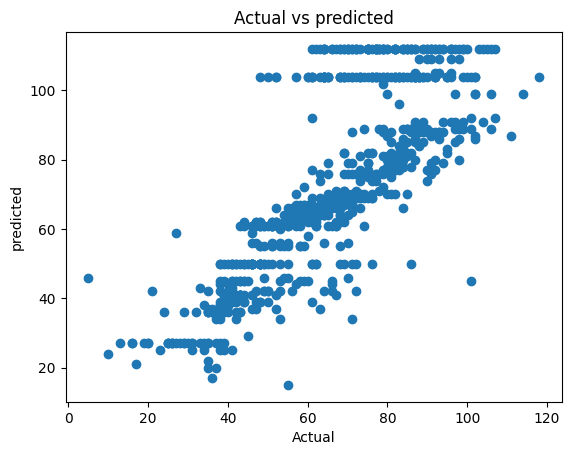

In [14]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [15]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,57,67,-10
182,25,27,-2
565,44,50,-6
457,39,50,-11
1852,83,79,4
568,40,44,-4
1340,71,65,6
778,48,104,-56
562,43,41,2
716,58,61,-3


## linear regression

In [16]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [17]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [58.44108512]


In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.7936566782241785

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 82.87223245869806
mean absolute error: 6.662577324712621


Text(0.5, 1.0, 'Actual vs predicted')

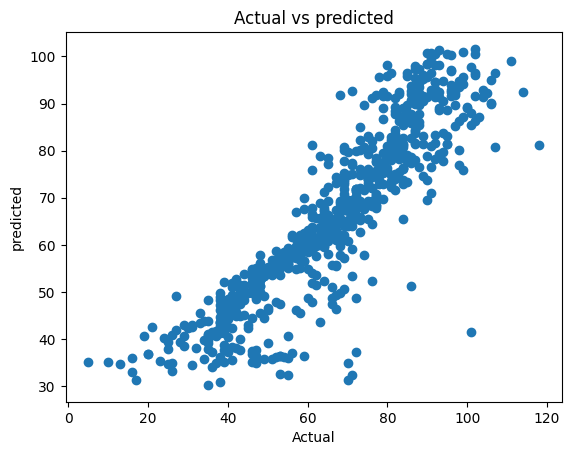

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [21]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,57,61.289569,-4.289569
182,25,34.755826,-9.755826
565,44,49.415105,-5.415105
457,39,52.054731,-13.054731
1852,83,82.490036,0.509964
568,40,47.430382,-7.430382
1340,71,63.957907,7.042093
778,48,57.900977,-9.900977
562,43,49.454448,-6.454448
716,58,55.151728,2.848272


## Random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,1,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [60.335]


In [40]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.8775786766950847

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 49.167224194677864
mean absolute error: 4.597682072829132


Text(0.5, 1.0, 'Actual vs predicted')

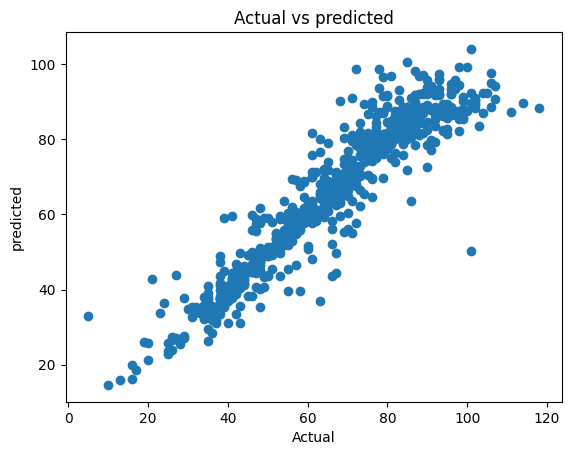

In [42]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [43]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,57,58.975,-1.975
182,25,25.920,-0.920
565,44,43.400,0.600
457,39,44.855,-5.855
1852,83,90.380,-7.380
568,40,40.840,-0.840
1340,71,68.590,2.410
778,48,57.835,-9.835
562,43,43.415,-0.415
716,58,57.275,0.725


## KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [60.63333333]


In [45]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.8282571972083891

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 68.97586679116091
mean absolute error: 5.645845004668534


Text(0.5, 1.0, 'Actual vs predicted')

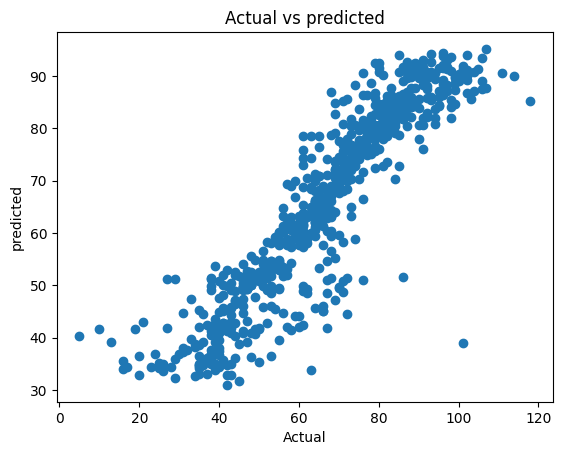

In [47]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [48]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,57,58.300000,-1.300000
182,25,34.166667,-9.166667
565,44,47.266667,-3.266667
457,39,53.633333,-14.633333
1852,83,82.800000,0.200000
568,40,47.633333,-7.633333
1340,71,73.500000,-2.500000
778,48,55.633333,-7.633333
562,43,45.933333,-2.933333
716,58,54.333333,3.666667


## CNN

In [49]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                2

In [50]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 9ms/step - loss: 1146.6300 - mae: 24.8311 - val_loss: 236.8238 - val_mae: 13.4712
Epoch 2/2000
37/37 [==============================] - 0s 4ms/step - loss: 164.5661 - mae: 9.8252 - val_loss: 109.6856 - val_mae: 8.0451
Epoch 3/2000
37/37 [==============================] - 0s 4ms/step - loss: 144.4901 - mae: 9.1175 - val_loss: 143.4365 - val_mae: 9.7004
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 131.8391 - mae: 8.7205 - val_loss: 122.4843 - val_mae: 8.7601
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 127.8659 - mae: 8.4360 - val_loss: 152.0038 - val_mae: 10.0680
Epoch 6/2000
37/37 [==============================] - 0s 4ms/step - loss: 124.3226 - mae: 8.3104 - val_loss: 156.6527 - val_mae: 10.2795
Epoch 7/2000
37/37 [==============================] - 0s 4ms/step - loss: 123.0901 - mae: 8.2410 - val_loss: 133.4720 - val_mae: 9.2970
Epoch 8/2000
37/37 [=======================

37/37 [==============================] - 0s 4ms/step - loss: 69.6686 - mae: 6.1392 - val_loss: 107.3208 - val_mae: 7.8784
Epoch 122/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.7974 - mae: 6.0150 - val_loss: 92.6615 - val_mae: 7.1740
Epoch 123/2000
37/37 [==============================] - 0s 3ms/step - loss: 69.8388 - mae: 6.0376 - val_loss: 122.7549 - val_mae: 8.7041
Epoch 124/2000
37/37 [==============================] - 0s 3ms/step - loss: 69.6513 - mae: 6.1016 - val_loss: 104.5151 - val_mae: 7.8539
Epoch 125/2000
37/37 [==============================] - 0s 4ms/step - loss: 67.6977 - mae: 6.0123 - val_loss: 110.0441 - val_mae: 8.0027
Epoch 126/2000
37/37 [==============================] - 0s 3ms/step - loss: 70.2939 - mae: 6.0926 - val_loss: 113.0241 - val_mae: 8.2130
Epoch 127/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.4569 - mae: 6.0525 - val_loss: 132.1826 - val_mae: 9.0178
Epoch 128/2000
37/37 [==============================] - 0

37/37 [==============================] - 0s 5ms/step - loss: 67.9435 - mae: 5.9863 - val_loss: 112.2704 - val_mae: 8.1456
Epoch 182/2000
37/37 [==============================] - 0s 4ms/step - loss: 69.7244 - mae: 6.0188 - val_loss: 120.1957 - val_mae: 8.5002
Epoch 183/2000
37/37 [==============================] - 0s 5ms/step - loss: 65.5556 - mae: 5.8690 - val_loss: 108.4317 - val_mae: 7.9264
Epoch 184/2000
37/37 [==============================] - 0s 5ms/step - loss: 67.9578 - mae: 5.9436 - val_loss: 113.6284 - val_mae: 8.2003
Epoch 185/2000
37/37 [==============================] - 0s 5ms/step - loss: 67.2116 - mae: 5.9314 - val_loss: 119.7681 - val_mae: 8.4946
Epoch 186/2000
37/37 [==============================] - 0s 4ms/step - loss: 69.8214 - mae: 6.0046 - val_loss: 124.0765 - val_mae: 8.6666
Epoch 187/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.4965 - mae: 5.9402 - val_loss: 125.7595 - val_mae: 8.6742
Epoch 188/2000
37/37 [==============================] - 

Epoch 241/2000
37/37 [==============================] - 0s 4ms/step - loss: 69.8749 - mae: 6.1233 - val_loss: 118.6909 - val_mae: 8.4082
Epoch 242/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.7801 - mae: 6.0350 - val_loss: 129.7521 - val_mae: 8.8739
Epoch 243/2000
37/37 [==============================] - 0s 4ms/step - loss: 69.0226 - mae: 6.0197 - val_loss: 144.0456 - val_mae: 9.4546
Epoch 244/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.5247 - mae: 5.9813 - val_loss: 114.8465 - val_mae: 8.2142
Epoch 245/2000
37/37 [==============================] - 0s 5ms/step - loss: 66.4369 - mae: 5.8422 - val_loss: 107.1396 - val_mae: 7.9039
Epoch 246/2000
37/37 [==============================] - 0s 5ms/step - loss: 67.9097 - mae: 6.0016 - val_loss: 138.5031 - val_mae: 9.2761
Epoch 247/2000
37/37 [==============================] - 0s 5ms/step - loss: 66.5484 - mae: 5.8684 - val_loss: 144.9268 - val_mae: 9.4743
Epoch 248/2000
37/37 [===================

Epoch 301/2000
37/37 [==============================] - 0s 4ms/step - loss: 67.8292 - mae: 5.9901 - val_loss: 121.1828 - val_mae: 8.4930
Epoch 302/2000
37/37 [==============================] - 0s 4ms/step - loss: 71.7802 - mae: 6.1863 - val_loss: 170.1784 - val_mae: 10.4833
Epoch 303/2000
37/37 [==============================] - 0s 4ms/step - loss: 71.0834 - mae: 6.1998 - val_loss: 134.5364 - val_mae: 9.0763
Epoch 304/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.0002 - mae: 5.9022 - val_loss: 111.9932 - val_mae: 8.0999
Epoch 305/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.0972 - mae: 5.9027 - val_loss: 117.6509 - val_mae: 8.3283
Epoch 306/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.7029 - mae: 5.8362 - val_loss: 112.0117 - val_mae: 8.0588
Epoch 307/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.6739 - mae: 5.8116 - val_loss: 108.8277 - val_mae: 8.0506
Epoch 308/2000
37/37 [==================

Epoch 361/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.7672 - mae: 5.8722 - val_loss: 106.2380 - val_mae: 7.8320
Epoch 362/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.5793 - mae: 5.9071 - val_loss: 115.2332 - val_mae: 8.2291
Epoch 363/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.8384 - mae: 5.8419 - val_loss: 111.4973 - val_mae: 8.0977
Epoch 364/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.6230 - mae: 5.8439 - val_loss: 128.2216 - val_mae: 8.8275
Epoch 365/2000
37/37 [==============================] - 0s 4ms/step - loss: 67.9882 - mae: 5.9681 - val_loss: 144.3163 - val_mae: 9.4612
Epoch 366/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.4560 - mae: 5.9868 - val_loss: 119.6278 - val_mae: 8.4091
Epoch 367/2000
37/37 [==============================] - 0s 4ms/step - loss: 68.2332 - mae: 6.0002 - val_loss: 112.6942 - val_mae: 8.1475
Epoch 368/2000
37/37 [===================

Epoch 421/2000
37/37 [==============================] - 0s 3ms/step - loss: 68.2267 - mae: 6.0681 - val_loss: 132.7073 - val_mae: 8.9804
Epoch 422/2000
37/37 [==============================] - 0s 3ms/step - loss: 66.6509 - mae: 5.9018 - val_loss: 144.0278 - val_mae: 9.4673
Epoch 423/2000
37/37 [==============================] - 0s 3ms/step - loss: 66.6234 - mae: 5.9027 - val_loss: 126.3811 - val_mae: 8.7383
Epoch 424/2000
37/37 [==============================] - 0s 3ms/step - loss: 66.5330 - mae: 5.9277 - val_loss: 113.3164 - val_mae: 8.1156
Epoch 425/2000
37/37 [==============================] - 0s 3ms/step - loss: 66.6804 - mae: 5.8265 - val_loss: 136.6294 - val_mae: 9.1450
Epoch 426/2000
37/37 [==============================] - 0s 3ms/step - loss: 69.5640 - mae: 6.0635 - val_loss: 124.7689 - val_mae: 8.6511
Epoch 427/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.7253 - mae: 5.8717 - val_loss: 104.5781 - val_mae: 7.7716
Epoch 428/2000
37/37 [===================

Epoch 481/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.3584 - mae: 5.8386 - val_loss: 99.8046 - val_mae: 7.5858
Epoch 482/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.8858 - mae: 5.9246 - val_loss: 122.0810 - val_mae: 8.5595
Epoch 483/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.7024 - mae: 5.9786 - val_loss: 106.1642 - val_mae: 7.8462
Epoch 484/2000
37/37 [==============================] - 0s 4ms/step - loss: 66.3925 - mae: 5.8599 - val_loss: 112.1918 - val_mae: 8.1355
Epoch 485/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.8233 - mae: 5.8756 - val_loss: 118.8579 - val_mae: 8.4005
Epoch 486/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.1270 - mae: 5.7754 - val_loss: 139.2063 - val_mae: 9.2426
Epoch 487/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.8631 - mae: 5.8604 - val_loss: 135.5763 - val_mae: 9.0785
Epoch 488/2000
37/37 [====================

Epoch 541/2000
37/37 [==============================] - 0s 4ms/step - loss: 65.4743 - mae: 5.8463 - val_loss: 109.7219 - val_mae: 7.9860
Epoch 542/2000
37/37 [==============================] - 0s 3ms/step - loss: 66.6436 - mae: 5.9633 - val_loss: 110.6294 - val_mae: 8.0738
Epoch 543/2000
37/37 [==============================] - 0s 3ms/step - loss: 62.7457 - mae: 5.6134 - val_loss: 130.0619 - val_mae: 8.8511
Epoch 544/2000
37/37 [==============================] - 0s 3ms/step - loss: 63.7953 - mae: 5.6770 - val_loss: 113.2566 - val_mae: 8.0160
Epoch 545/2000
37/37 [==============================] - 0s 4ms/step - loss: 62.6626 - mae: 5.6369 - val_loss: 136.1345 - val_mae: 9.1325
Epoch 546/2000
37/37 [==============================] - 0s 4ms/step - loss: 62.3658 - mae: 5.6412 - val_loss: 119.0996 - val_mae: 8.3129
Epoch 547/2000
37/37 [==============================] - 0s 4ms/step - loss: 62.6623 - mae: 5.6881 - val_loss: 145.1799 - val_mae: 9.4060
Epoch 548/2000
37/37 [===================

Epoch 601/2000
37/37 [==============================] - 0s 6ms/step - loss: 57.6115 - mae: 5.2066 - val_loss: 91.9502 - val_mae: 6.7793
Epoch 602/2000
37/37 [==============================] - 0s 6ms/step - loss: 59.0098 - mae: 5.3249 - val_loss: 95.4616 - val_mae: 7.1907
Epoch 603/2000
37/37 [==============================] - 0s 5ms/step - loss: 59.7157 - mae: 5.2634 - val_loss: 93.1987 - val_mae: 6.9932
Epoch 604/2000
37/37 [==============================] - 0s 5ms/step - loss: 59.7351 - mae: 5.4071 - val_loss: 103.8260 - val_mae: 7.4756
Epoch 605/2000
37/37 [==============================] - 0s 4ms/step - loss: 59.5961 - mae: 5.4218 - val_loss: 99.6335 - val_mae: 7.5264
Epoch 606/2000
37/37 [==============================] - 0s 4ms/step - loss: 58.7285 - mae: 5.2634 - val_loss: 108.6231 - val_mae: 7.8718
Epoch 607/2000
37/37 [==============================] - 0s 4ms/step - loss: 58.0453 - mae: 5.2570 - val_loss: 86.7913 - val_mae: 6.6029
Epoch 608/2000
37/37 [========================

37/37 [==============================] - 0s 3ms/step - loss: 57.5268 - mae: 5.3004 - val_loss: 79.9662 - val_mae: 6.3460
Epoch 722/2000
37/37 [==============================] - 0s 3ms/step - loss: 56.0343 - mae: 5.1803 - val_loss: 88.7192 - val_mae: 6.7256
Epoch 723/2000
37/37 [==============================] - 0s 4ms/step - loss: 56.1290 - mae: 5.1116 - val_loss: 87.0779 - val_mae: 6.7384
Epoch 724/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.3442 - mae: 5.1269 - val_loss: 97.3071 - val_mae: 7.3114
Epoch 725/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.2375 - mae: 5.0148 - val_loss: 77.2065 - val_mae: 5.9408
Epoch 726/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.8164 - mae: 5.0959 - val_loss: 92.3878 - val_mae: 7.1503
Epoch 727/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.9935 - mae: 5.0688 - val_loss: 125.0903 - val_mae: 8.9951
Epoch 728/2000
37/37 [==============================] - 0s 3ms

37/37 [==============================] - 0s 5ms/step - loss: 52.7069 - mae: 4.9074 - val_loss: 96.5304 - val_mae: 7.2794
Epoch 842/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.3941 - mae: 4.9792 - val_loss: 110.2985 - val_mae: 8.2416
Epoch 843/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.7117 - mae: 5.0849 - val_loss: 102.4058 - val_mae: 7.6622
Epoch 844/2000
37/37 [==============================] - 0s 5ms/step - loss: 56.0323 - mae: 5.1282 - val_loss: 77.6717 - val_mae: 6.1407
Epoch 845/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.0215 - mae: 5.1413 - val_loss: 102.8425 - val_mae: 7.9092
Epoch 846/2000
37/37 [==============================] - 0s 5ms/step - loss: 54.5662 - mae: 5.0516 - val_loss: 65.9886 - val_mae: 5.4040
Epoch 847/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.8445 - mae: 5.0806 - val_loss: 93.5546 - val_mae: 7.3111
Epoch 848/2000
37/37 [==============================] - 0s 5

37/37 [==============================] - 0s 5ms/step - loss: 54.7459 - mae: 4.9925 - val_loss: 100.7566 - val_mae: 7.6870
Epoch 902/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.2887 - mae: 4.9700 - val_loss: 107.7084 - val_mae: 8.1652
Epoch 903/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.8968 - mae: 4.9902 - val_loss: 113.3834 - val_mae: 8.4117
Epoch 904/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.9275 - mae: 4.9980 - val_loss: 108.4895 - val_mae: 8.1444
Epoch 905/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.8769 - mae: 5.0086 - val_loss: 122.5873 - val_mae: 8.8054
Epoch 906/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.5516 - mae: 5.0948 - val_loss: 88.3598 - val_mae: 6.9823
Epoch 907/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.4107 - mae: 5.0005 - val_loss: 135.2512 - val_mae: 9.4746
Epoch 908/2000
37/37 [==============================] - 0

Epoch 961/2000
37/37 [==============================] - 0s 5ms/step - loss: 54.0276 - mae: 5.0640 - val_loss: 103.7051 - val_mae: 7.9540
Epoch 962/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.2027 - mae: 4.9276 - val_loss: 127.5551 - val_mae: 9.1617
Epoch 963/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.5720 - mae: 5.1546 - val_loss: 107.3174 - val_mae: 8.0812
Epoch 964/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.4359 - mae: 4.9885 - val_loss: 124.2308 - val_mae: 9.0181
Epoch 965/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.0289 - mae: 4.8701 - val_loss: 96.1258 - val_mae: 7.5342
Epoch 966/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.1825 - mae: 4.9496 - val_loss: 122.6486 - val_mae: 8.9520
Epoch 967/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.2999 - mae: 5.1153 - val_loss: 137.8427 - val_mae: 9.5657
Epoch 968/2000
37/37 [====================

Epoch 1021/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.9007 - mae: 5.0178 - val_loss: 128.3153 - val_mae: 9.1883
Epoch 1022/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.3255 - mae: 4.8819 - val_loss: 121.5475 - val_mae: 8.8849
Epoch 1023/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.6913 - mae: 4.9644 - val_loss: 102.6877 - val_mae: 7.9130
Epoch 1024/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.3594 - mae: 4.8174 - val_loss: 120.8976 - val_mae: 8.8417
Epoch 1025/2000
37/37 [==============================] - 0s 6ms/step - loss: 54.2775 - mae: 5.0908 - val_loss: 108.6249 - val_mae: 8.2709
Epoch 1026/2000
37/37 [==============================] - 0s 6ms/step - loss: 55.7951 - mae: 5.2143 - val_loss: 132.2316 - val_mae: 9.3419
Epoch 1027/2000
37/37 [==============================] - 0s 6ms/step - loss: 54.7519 - mae: 5.0624 - val_loss: 142.2435 - val_mae: 9.8236
Epoch 1028/2000
37/37 [===========

37/37 [==============================] - 0s 6ms/step - loss: 52.8519 - mae: 4.9842 - val_loss: 121.0737 - val_mae: 8.8339
Epoch 1140/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.4147 - mae: 4.9826 - val_loss: 176.3210 - val_mae: 11.1622
Epoch 1141/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.8027 - mae: 5.0074 - val_loss: 168.4370 - val_mae: 10.8672
Epoch 1142/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.6582 - mae: 4.9368 - val_loss: 94.4221 - val_mae: 7.4442
Epoch 1143/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.3340 - mae: 4.9551 - val_loss: 171.9534 - val_mae: 10.9443
Epoch 1144/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.9918 - mae: 5.0238 - val_loss: 137.1252 - val_mae: 9.5997
Epoch 1145/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.1026 - mae: 4.8530 - val_loss: 137.7122 - val_mae: 9.6052
Epoch 1146/2000
37/37 [=========================

37/37 [==============================] - 0s 6ms/step - loss: 52.6204 - mae: 4.9269 - val_loss: 127.5039 - val_mae: 9.1315
Epoch 1258/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.4455 - mae: 4.8715 - val_loss: 134.4275 - val_mae: 9.4314
Epoch 1259/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.6197 - mae: 5.0236 - val_loss: 166.0342 - val_mae: 10.7909
Epoch 1260/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.3127 - mae: 4.9754 - val_loss: 135.2724 - val_mae: 9.5175
Epoch 1261/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.2931 - mae: 4.8316 - val_loss: 163.9821 - val_mae: 10.7231
Epoch 1262/2000
37/37 [==============================] - 0s 5ms/step - loss: 54.3860 - mae: 5.0195 - val_loss: 113.0150 - val_mae: 8.4364
Epoch 1263/2000
37/37 [==============================] - 0s 6ms/step - loss: 56.2927 - mae: 5.2689 - val_loss: 111.8254 - val_mae: 8.4287
Epoch 1264/2000
37/37 [=========================

37/37 [==============================] - 0s 4ms/step - loss: 54.1438 - mae: 4.9911 - val_loss: 143.0867 - val_mae: 9.7900
Epoch 1376/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.2913 - mae: 4.8475 - val_loss: 129.5841 - val_mae: 9.2668
Epoch 1377/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.4396 - mae: 4.8591 - val_loss: 138.9342 - val_mae: 9.6894
Epoch 1378/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.2201 - mae: 4.9048 - val_loss: 122.0701 - val_mae: 8.9137
Epoch 1379/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.9519 - mae: 4.9517 - val_loss: 119.2348 - val_mae: 8.7523
Epoch 1380/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.7363 - mae: 4.8631 - val_loss: 152.6365 - val_mae: 10.2423
Epoch 1381/2000
37/37 [==============================] - 0s 4ms/step - loss: 53.4432 - mae: 4.9574 - val_loss: 126.7471 - val_mae: 9.1342
Epoch 1382/2000
37/37 [==========================

37/37 [==============================] - 0s 4ms/step - loss: 53.6761 - mae: 5.0446 - val_loss: 116.4847 - val_mae: 8.6627
Epoch 1494/2000
37/37 [==============================] - 0s 4ms/step - loss: 51.9446 - mae: 4.8894 - val_loss: 139.6993 - val_mae: 9.6828
Epoch 1495/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.4486 - mae: 4.8377 - val_loss: 154.8208 - val_mae: 10.3059
Epoch 1496/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.1376 - mae: 4.8506 - val_loss: 128.0968 - val_mae: 9.1763
Epoch 1497/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.0587 - mae: 4.7935 - val_loss: 124.0863 - val_mae: 9.0042
Epoch 1498/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.1232 - mae: 4.9647 - val_loss: 151.1420 - val_mae: 10.1485
Epoch 1499/2000
37/37 [==============================] - 0s 4ms/step - loss: 51.4892 - mae: 4.7968 - val_loss: 163.4559 - val_mae: 10.6885
Epoch 1500/2000
37/37 [========================

37/37 [==============================] - 0s 4ms/step - loss: 52.2465 - mae: 4.8846 - val_loss: 194.8923 - val_mae: 11.8080
Epoch 1612/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.2515 - mae: 4.9182 - val_loss: 126.8997 - val_mae: 9.1336
Epoch 1613/2000
37/37 [==============================] - 0s 6ms/step - loss: 51.8622 - mae: 4.8236 - val_loss: 139.8265 - val_mae: 9.6915
Epoch 1614/2000
37/37 [==============================] - 0s 4ms/step - loss: 53.1858 - mae: 4.9274 - val_loss: 171.4239 - val_mae: 10.9391
Epoch 1615/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.7248 - mae: 4.9528 - val_loss: 141.3707 - val_mae: 9.7575
Epoch 1616/2000
37/37 [==============================] - 0s 4ms/step - loss: 51.9255 - mae: 4.7899 - val_loss: 129.5618 - val_mae: 9.2704
Epoch 1617/2000
37/37 [==============================] - 0s 4ms/step - loss: 51.9185 - mae: 4.8823 - val_loss: 131.4888 - val_mae: 9.3354
Epoch 1618/2000
37/37 [=========================

37/37 [==============================] - 0s 7ms/step - loss: 53.4558 - mae: 4.8881 - val_loss: 141.3497 - val_mae: 9.7898
Epoch 1730/2000
37/37 [==============================] - 0s 6ms/step - loss: 52.2051 - mae: 4.8980 - val_loss: 131.1590 - val_mae: 9.3146
Epoch 1731/2000
37/37 [==============================] - 0s 6ms/step - loss: 51.6006 - mae: 4.9142 - val_loss: 156.7089 - val_mae: 10.4095
Epoch 1732/2000
37/37 [==============================] - 0s 7ms/step - loss: 51.3967 - mae: 4.7938 - val_loss: 146.3614 - val_mae: 9.9804
Epoch 1733/2000
37/37 [==============================] - 0s 7ms/step - loss: 51.9645 - mae: 4.7813 - val_loss: 144.8536 - val_mae: 9.8852
Epoch 1734/2000
37/37 [==============================] - 0s 6ms/step - loss: 52.8187 - mae: 4.8928 - val_loss: 130.1623 - val_mae: 9.2646
Epoch 1735/2000
37/37 [==============================] - 0s 7ms/step - loss: 52.3278 - mae: 4.8593 - val_loss: 137.9274 - val_mae: 9.5738
Epoch 1736/2000
37/37 [==========================

37/37 [==============================] - 0s 7ms/step - loss: 51.1319 - mae: 4.8238 - val_loss: 153.3627 - val_mae: 10.2338
Epoch 1848/2000
37/37 [==============================] - 0s 7ms/step - loss: 52.9353 - mae: 4.9625 - val_loss: 169.4333 - val_mae: 10.9029
Epoch 1849/2000
37/37 [==============================] - 0s 7ms/step - loss: 52.6255 - mae: 4.9401 - val_loss: 164.8611 - val_mae: 10.6657
Epoch 1850/2000
37/37 [==============================] - 0s 6ms/step - loss: 52.9999 - mae: 4.8268 - val_loss: 135.1711 - val_mae: 9.4831
Epoch 1851/2000
37/37 [==============================] - 0s 6ms/step - loss: 54.4977 - mae: 4.9557 - val_loss: 147.6628 - val_mae: 10.0224
Epoch 1852/2000
37/37 [==============================] - 0s 6ms/step - loss: 51.8303 - mae: 4.8246 - val_loss: 145.2537 - val_mae: 9.8829
Epoch 1853/2000
37/37 [==============================] - 0s 6ms/step - loss: 51.9268 - mae: 4.7969 - val_loss: 119.0485 - val_mae: 8.7406
Epoch 1854/2000
37/37 [=======================

37/37 [==============================] - 0s 8ms/step - loss: 51.8585 - mae: 4.8894 - val_loss: 156.0508 - val_mae: 10.3708
Epoch 1966/2000
37/37 [==============================] - 0s 7ms/step - loss: 51.9601 - mae: 4.7824 - val_loss: 155.8474 - val_mae: 10.3700
Epoch 1967/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.1795 - mae: 4.9290 - val_loss: 161.0560 - val_mae: 10.5766
Epoch 1968/2000
37/37 [==============================] - 0s 7ms/step - loss: 53.1175 - mae: 4.8886 - val_loss: 131.4747 - val_mae: 9.3087
Epoch 1969/2000
37/37 [==============================] - 0s 6ms/step - loss: 51.9911 - mae: 4.8533 - val_loss: 128.5549 - val_mae: 9.2003
Epoch 1970/2000
37/37 [==============================] - 0s 7ms/step - loss: 51.3777 - mae: 4.8474 - val_loss: 155.1537 - val_mae: 10.3153
Epoch 1971/2000
37/37 [==============================] - 0s 7ms/step - loss: 52.0588 - mae: 4.9391 - val_loss: 147.0031 - val_mae: 10.0183
Epoch 1972/2000
37/37 [======================

In [51]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

23/23 [==============================] - 0s 2ms/step


0.6132586713823931

In [52]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 411ms/step
Prediction: 49.284690856933594


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 2ms/step
mean squired error: 155.3242286241975
mean absolute error: 10.201664740297975


23/23 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

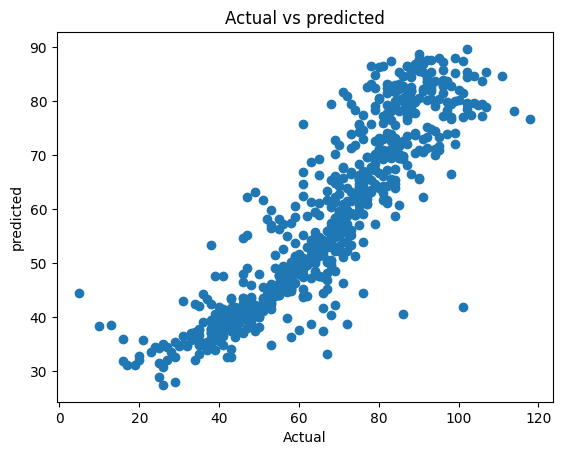

In [54]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [55]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 2ms/step


,Actual,predict,differences
898,57,48.613426,8.386574
182,25,28.943985,-3.943985
565,44,40.100037,3.899963
457,39,39.986256,-0.986256
1852,83,76.436592,6.563408
568,40,38.398190,1.601810
1340,71,60.843876,10.156124
778,48,43.700478,4.299522
562,43,40.212284,2.787716
716,58,46.219509,11.780491


## NN with dense layer

In [56]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [57]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 3s 16ms/step - loss: 1786.0366 - mae: 29.8273 - val_loss: 141.2442 - val_mae: 8.8166
Epoch 2/2000
37/37 [==============================] - 0s 6ms/step - loss: 130.3208 - mae: 8.6713 - val_loss: 106.0428 - val_mae: 7.6158
Epoch 3/2000
37/37 [==============================] - 0s 5ms/step - loss: 106.9609 - mae: 7.3883 - val_loss: 94.8182 - val_mae: 7.1154
Epoch 4/2000
37/37 [==============================] - 0s 4ms/step - loss: 99.5262 - mae: 7.0507 - val_loss: 88.3348 - val_mae: 6.6511
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 96.1159 - mae: 6.7642 - val_loss: 84.7316 - val_mae: 6.4798
Epoch 6/2000
37/37 [==============================] - 0s 5ms/step - loss: 92.7525 - mae: 6.6095 - val_loss: 82.2914 - val_mae: 6.3296
Epoch 7/2000
37/37 [==============================] - 0s 5ms/step - loss: 90.8187 - mae: 6.5166 - val_loss: 80.6227 - val_mae: 6.3331
Epoch 8/2000
37/37 [==============================] - 

Epoch 62/2000
37/37 [==============================] - 0s 5ms/step - loss: 57.2327 - mae: 5.1173 - val_loss: 56.1386 - val_mae: 4.9531
Epoch 63/2000
37/37 [==============================] - 0s 4ms/step - loss: 61.6631 - mae: 5.5982 - val_loss: 59.2161 - val_mae: 5.2453
Epoch 64/2000
37/37 [==============================] - 0s 5ms/step - loss: 57.2512 - mae: 5.2121 - val_loss: 54.7850 - val_mae: 4.8591
Epoch 65/2000
37/37 [==============================] - 0s 5ms/step - loss: 57.1763 - mae: 5.1487 - val_loss: 56.6202 - val_mae: 5.0710
Epoch 66/2000
37/37 [==============================] - 0s 4ms/step - loss: 57.0452 - mae: 5.1548 - val_loss: 60.4316 - val_mae: 5.4702
Epoch 67/2000
37/37 [==============================] - 0s 6ms/step - loss: 55.8828 - mae: 5.0512 - val_loss: 58.6007 - val_mae: 5.2052
Epoch 68/2000
37/37 [==============================] - 0s 6ms/step - loss: 58.4042 - mae: 5.2615 - val_loss: 56.9463 - val_mae: 5.1567
Epoch 69/2000
37/37 [==============================] - 

37/37 [==============================] - 0s 5ms/step - loss: 56.0704 - mae: 5.1506 - val_loss: 54.6077 - val_mae: 4.9242
Epoch 183/2000
37/37 [==============================] - 0s 5ms/step - loss: 55.4624 - mae: 5.1422 - val_loss: 54.0949 - val_mae: 4.8908
Epoch 184/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.6251 - mae: 5.1585 - val_loss: 69.2496 - val_mae: 5.9566
Epoch 185/2000
37/37 [==============================] - 0s 6ms/step - loss: 56.3313 - mae: 5.1401 - val_loss: 53.3023 - val_mae: 4.8474
Epoch 186/2000
37/37 [==============================] - 0s 6ms/step - loss: 53.3235 - mae: 4.9536 - val_loss: 55.7976 - val_mae: 4.9356
Epoch 187/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.0565 - mae: 4.8142 - val_loss: 53.8538 - val_mae: 4.9345
Epoch 188/2000
37/37 [==============================] - 0s 5ms/step - loss: 53.5539 - mae: 4.9847 - val_loss: 54.2192 - val_mae: 4.8958
Epoch 189/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 5ms/step - loss: 51.3325 - mae: 4.8827 - val_loss: 57.4947 - val_mae: 5.0929
Epoch 303/2000
37/37 [==============================] - 0s 5ms/step - loss: 51.6486 - mae: 4.8014 - val_loss: 54.4935 - val_mae: 4.9830
Epoch 304/2000
37/37 [==============================] - 0s 5ms/step - loss: 50.2888 - mae: 4.7245 - val_loss: 53.1412 - val_mae: 4.9448
Epoch 305/2000
37/37 [==============================] - 0s 5ms/step - loss: 50.8989 - mae: 4.8151 - val_loss: 54.1950 - val_mae: 4.9640
Epoch 306/2000
37/37 [==============================] - 0s 5ms/step - loss: 52.3230 - mae: 4.8851 - val_loss: 54.0702 - val_mae: 4.9376
Epoch 307/2000
37/37 [==============================] - 0s 6ms/step - loss: 49.7676 - mae: 4.7283 - val_loss: 52.6640 - val_mae: 4.7883
Epoch 308/2000
37/37 [==============================] - 0s 5ms/step - loss: 51.4341 - mae: 4.8188 - val_loss: 53.1814 - val_mae: 4.9633
Epoch 309/2000
37/37 [==============================] - 0s 5ms/

37/37 [==============================] - 0s 5ms/step - loss: 45.9715 - mae: 4.5717 - val_loss: 52.5763 - val_mae: 4.8251
Epoch 423/2000
37/37 [==============================] - 0s 5ms/step - loss: 46.0786 - mae: 4.5507 - val_loss: 51.5510 - val_mae: 4.7392
Epoch 424/2000
37/37 [==============================] - 0s 5ms/step - loss: 46.0629 - mae: 4.5604 - val_loss: 51.4302 - val_mae: 4.7873
Epoch 425/2000
37/37 [==============================] - 0s 6ms/step - loss: 46.7312 - mae: 4.5789 - val_loss: 60.2554 - val_mae: 5.3777
Epoch 426/2000
37/37 [==============================] - 0s 4ms/step - loss: 46.8781 - mae: 4.7177 - val_loss: 53.9480 - val_mae: 4.9501
Epoch 427/2000
37/37 [==============================] - 0s 6ms/step - loss: 45.5137 - mae: 4.5243 - val_loss: 52.3109 - val_mae: 4.8720
Epoch 428/2000
37/37 [==============================] - 0s 6ms/step - loss: 46.9153 - mae: 4.6276 - val_loss: 51.8914 - val_mae: 4.7010
Epoch 429/2000
37/37 [==============================] - 0s 5ms/

37/37 [==============================] - 0s 5ms/step - loss: 43.8700 - mae: 4.4579 - val_loss: 51.9411 - val_mae: 4.6977
Epoch 543/2000
37/37 [==============================] - 0s 6ms/step - loss: 43.1621 - mae: 4.3815 - val_loss: 52.3136 - val_mae: 4.8700
Epoch 544/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.3148 - mae: 4.4607 - val_loss: 55.6807 - val_mae: 5.1772
Epoch 545/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.2296 - mae: 4.4709 - val_loss: 50.7373 - val_mae: 4.6887
Epoch 546/2000
37/37 [==============================] - 0s 6ms/step - loss: 42.8649 - mae: 4.4407 - val_loss: 51.6013 - val_mae: 4.8048
Epoch 547/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.4812 - mae: 4.4407 - val_loss: 52.6246 - val_mae: 4.7563
Epoch 548/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.5064 - mae: 4.4925 - val_loss: 50.1152 - val_mae: 4.6610
Epoch 549/2000
37/37 [==============================] - 0s 5ms/

37/37 [==============================] - 0s 5ms/step - loss: 40.2604 - mae: 4.2421 - val_loss: 50.9531 - val_mae: 4.6447
Epoch 663/2000
37/37 [==============================] - 0s 5ms/step - loss: 40.3781 - mae: 4.2854 - val_loss: 50.8333 - val_mae: 4.5868
Epoch 664/2000
37/37 [==============================] - 0s 5ms/step - loss: 39.5683 - mae: 4.1956 - val_loss: 51.1468 - val_mae: 4.6253
Epoch 665/2000
37/37 [==============================] - 0s 4ms/step - loss: 40.9648 - mae: 4.2709 - val_loss: 55.2218 - val_mae: 4.9882
Epoch 666/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.1421 - mae: 4.2181 - val_loss: 53.0182 - val_mae: 4.7102
Epoch 667/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.5873 - mae: 4.2813 - val_loss: 50.5641 - val_mae: 4.5902
Epoch 668/2000
37/37 [==============================] - 0s 5ms/step - loss: 40.2859 - mae: 4.2776 - val_loss: 50.3935 - val_mae: 4.5732
Epoch 669/2000
37/37 [==============================] - 0s 5ms/

37/37 [==============================] - 0s 5ms/step - loss: 38.8141 - mae: 4.1959 - val_loss: 52.4601 - val_mae: 4.7491
Epoch 783/2000
37/37 [==============================] - 0s 7ms/step - loss: 39.9558 - mae: 4.1825 - val_loss: 51.3518 - val_mae: 4.5931
Epoch 784/2000
37/37 [==============================] - 0s 5ms/step - loss: 37.9384 - mae: 4.1222 - val_loss: 51.9050 - val_mae: 4.7059
Epoch 785/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.1687 - mae: 4.2723 - val_loss: 50.9314 - val_mae: 4.6450
Epoch 786/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.8645 - mae: 4.1604 - val_loss: 51.9615 - val_mae: 4.6635
Epoch 787/2000
37/37 [==============================] - 0s 5ms/step - loss: 40.0270 - mae: 4.2569 - val_loss: 55.1926 - val_mae: 5.0343
Epoch 788/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.4910 - mae: 4.2201 - val_loss: 51.3557 - val_mae: 4.6272
Epoch 789/2000
37/37 [==============================] - 0s 7ms/

37/37 [==============================] - 0s 6ms/step - loss: 36.6967 - mae: 4.0109 - val_loss: 51.2028 - val_mae: 4.5603
Epoch 903/2000
37/37 [==============================] - 0s 5ms/step - loss: 38.4578 - mae: 4.2049 - val_loss: 51.5222 - val_mae: 4.6410
Epoch 904/2000
37/37 [==============================] - 0s 5ms/step - loss: 37.2407 - mae: 4.1331 - val_loss: 58.5098 - val_mae: 5.2693
Epoch 905/2000
37/37 [==============================] - 0s 5ms/step - loss: 38.1603 - mae: 4.1232 - val_loss: 50.7613 - val_mae: 4.4881
Epoch 906/2000
37/37 [==============================] - 0s 5ms/step - loss: 37.5696 - mae: 4.1872 - val_loss: 57.2741 - val_mae: 5.0760
Epoch 907/2000
37/37 [==============================] - 0s 5ms/step - loss: 38.2626 - mae: 4.1485 - val_loss: 49.8897 - val_mae: 4.4354
Epoch 908/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.9216 - mae: 4.1279 - val_loss: 52.6614 - val_mae: 4.8032
Epoch 909/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 4ms/step - loss: 36.8119 - mae: 4.0724 - val_loss: 51.2648 - val_mae: 4.6317
Epoch 1023/2000
37/37 [==============================] - 0s 10ms/step - loss: 35.7706 - mae: 4.0216 - val_loss: 50.7915 - val_mae: 4.5382
Epoch 1024/2000
37/37 [==============================] - 0s 10ms/step - loss: 36.2378 - mae: 4.0496 - val_loss: 51.9143 - val_mae: 4.6937
Epoch 1025/2000
37/37 [==============================] - 0s 8ms/step - loss: 34.8706 - mae: 3.9390 - val_loss: 50.5713 - val_mae: 4.5399
Epoch 1026/2000
37/37 [==============================] - 0s 8ms/step - loss: 35.9361 - mae: 3.9687 - val_loss: 51.0712 - val_mae: 4.5220
Epoch 1027/2000
37/37 [==============================] - 0s 5ms/step - loss: 35.9115 - mae: 4.0077 - val_loss: 51.5720 - val_mae: 4.6058
Epoch 1028/2000
37/37 [==============================] - 0s 6ms/step - loss: 35.8922 - mae: 4.0125 - val_loss: 51.6813 - val_mae: 4.5790
Epoch 1029/2000
37/37 [==============================] 

Epoch 1082/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.9866 - mae: 3.9317 - val_loss: 52.6146 - val_mae: 4.6047
Epoch 1083/2000
37/37 [==============================] - 0s 4ms/step - loss: 34.8598 - mae: 3.9300 - val_loss: 52.7205 - val_mae: 4.6160
Epoch 1084/2000
37/37 [==============================] - 0s 5ms/step - loss: 35.1597 - mae: 4.0575 - val_loss: 51.2427 - val_mae: 4.5482
Epoch 1085/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.8066 - mae: 3.9254 - val_loss: 52.2078 - val_mae: 4.5944
Epoch 1086/2000
37/37 [==============================] - 0s 4ms/step - loss: 37.3945 - mae: 4.3179 - val_loss: 60.8726 - val_mae: 5.4447
Epoch 1087/2000
37/37 [==============================] - 0s 5ms/step - loss: 36.2771 - mae: 4.0718 - val_loss: 49.8279 - val_mae: 4.4066
Epoch 1088/2000
37/37 [==============================] - 0s 4ms/step - loss: 34.6935 - mae: 3.9259 - val_loss: 50.5839 - val_mae: 4.4518
Epoch 1089/2000
37/37 [==================

Epoch 1142/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.7573 - mae: 4.0037 - val_loss: 52.2176 - val_mae: 4.4744
Epoch 1143/2000
37/37 [==============================] - 0s 4ms/step - loss: 34.7604 - mae: 3.9327 - val_loss: 49.3172 - val_mae: 4.4165
Epoch 1144/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.6818 - mae: 3.9428 - val_loss: 52.1952 - val_mae: 4.7174
Epoch 1145/2000
37/37 [==============================] - 0s 5ms/step - loss: 33.8625 - mae: 3.8828 - val_loss: 51.9683 - val_mae: 4.6231
Epoch 1146/2000
37/37 [==============================] - 0s 4ms/step - loss: 36.1466 - mae: 4.0993 - val_loss: 50.0685 - val_mae: 4.4199
Epoch 1147/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.7195 - mae: 4.0091 - val_loss: 53.0641 - val_mae: 4.6004
Epoch 1148/2000
37/37 [==============================] - 0s 5ms/step - loss: 33.2769 - mae: 3.8193 - val_loss: 51.0153 - val_mae: 4.5119
Epoch 1149/2000
37/37 [==================

Epoch 1202/2000
37/37 [==============================] - 0s 5ms/step - loss: 33.2059 - mae: 3.8755 - val_loss: 52.7835 - val_mae: 4.4637
Epoch 1203/2000
37/37 [==============================] - 0s 5ms/step - loss: 33.5762 - mae: 3.9027 - val_loss: 49.4254 - val_mae: 4.4138
Epoch 1204/2000
37/37 [==============================] - 0s 5ms/step - loss: 32.2378 - mae: 3.8202 - val_loss: 52.6562 - val_mae: 4.5929
Epoch 1205/2000
37/37 [==============================] - 0s 4ms/step - loss: 32.4331 - mae: 3.8390 - val_loss: 52.8573 - val_mae: 4.6127
Epoch 1206/2000
37/37 [==============================] - 0s 5ms/step - loss: 32.5614 - mae: 3.8226 - val_loss: 55.9986 - val_mae: 4.8962
Epoch 1207/2000
37/37 [==============================] - 0s 6ms/step - loss: 35.0376 - mae: 4.0711 - val_loss: 55.2800 - val_mae: 4.7823
Epoch 1208/2000
37/37 [==============================] - 0s 5ms/step - loss: 32.8855 - mae: 3.8736 - val_loss: 50.3490 - val_mae: 4.4199
Epoch 1209/2000
37/37 [==================

Epoch 1262/2000
37/37 [==============================] - 0s 5ms/step - loss: 33.4352 - mae: 3.9317 - val_loss: 52.8142 - val_mae: 4.5276
Epoch 1263/2000
37/37 [==============================] - 0s 5ms/step - loss: 32.5737 - mae: 3.8721 - val_loss: 52.1183 - val_mae: 4.4893
Epoch 1264/2000
37/37 [==============================] - 0s 4ms/step - loss: 31.4902 - mae: 3.7803 - val_loss: 51.8048 - val_mae: 4.4082
Epoch 1265/2000
37/37 [==============================] - 0s 4ms/step - loss: 31.9369 - mae: 3.8135 - val_loss: 55.7447 - val_mae: 4.8373
Epoch 1266/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.2347 - mae: 3.9663 - val_loss: 51.0928 - val_mae: 4.4520
Epoch 1267/2000
37/37 [==============================] - 0s 4ms/step - loss: 33.4150 - mae: 3.8431 - val_loss: 54.9490 - val_mae: 4.6724
Epoch 1268/2000
37/37 [==============================] - 0s 4ms/step - loss: 33.4692 - mae: 3.9070 - val_loss: 52.5521 - val_mae: 4.5777
Epoch 1269/2000
37/37 [==================

Epoch 1322/2000
37/37 [==============================] - 0s 4ms/step - loss: 31.6949 - mae: 3.8505 - val_loss: 54.7741 - val_mae: 4.5281
Epoch 1323/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.1273 - mae: 3.6338 - val_loss: 51.7091 - val_mae: 4.4674
Epoch 1324/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.1683 - mae: 3.6297 - val_loss: 53.6751 - val_mae: 4.6288
Epoch 1325/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.1127 - mae: 3.7746 - val_loss: 54.1287 - val_mae: 4.6113
Epoch 1326/2000
37/37 [==============================] - 0s 4ms/step - loss: 31.2963 - mae: 3.7371 - val_loss: 51.6661 - val_mae: 4.4774
Epoch 1327/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.8584 - mae: 3.7573 - val_loss: 51.1121 - val_mae: 4.3774
Epoch 1328/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.7892 - mae: 3.6675 - val_loss: 53.0439 - val_mae: 4.6087
Epoch 1329/2000
37/37 [==================

Epoch 1382/2000
37/37 [==============================] - 0s 4ms/step - loss: 31.0258 - mae: 3.7781 - val_loss: 52.5795 - val_mae: 4.4273
Epoch 1383/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.3506 - mae: 3.6512 - val_loss: 54.1656 - val_mae: 4.6838
Epoch 1384/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.7788 - mae: 3.7383 - val_loss: 58.5492 - val_mae: 4.9642
Epoch 1385/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.3672 - mae: 3.7585 - val_loss: 51.4307 - val_mae: 4.4102
Epoch 1386/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.8384 - mae: 3.7783 - val_loss: 52.9485 - val_mae: 4.5388
Epoch 1387/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.8337 - mae: 3.9040 - val_loss: 54.7817 - val_mae: 4.7363
Epoch 1388/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.2759 - mae: 3.7785 - val_loss: 54.0786 - val_mae: 4.5717
Epoch 1389/2000
37/37 [==================

Epoch 1442/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.2310 - mae: 3.5916 - val_loss: 54.6215 - val_mae: 4.6670
Epoch 1443/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.4872 - mae: 3.6974 - val_loss: 55.0620 - val_mae: 4.5214
Epoch 1444/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.9290 - mae: 3.6464 - val_loss: 53.5923 - val_mae: 4.5555
Epoch 1445/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.1182 - mae: 3.5731 - val_loss: 56.4167 - val_mae: 4.7489
Epoch 1446/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.2171 - mae: 3.7821 - val_loss: 53.7728 - val_mae: 4.4783
Epoch 1447/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.8592 - mae: 3.8272 - val_loss: 54.1371 - val_mae: 4.5960
Epoch 1448/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.8256 - mae: 3.7566 - val_loss: 53.7696 - val_mae: 4.4250
Epoch 1449/2000
37/37 [==================

Epoch 1502/2000
37/37 [==============================] - 0s 6ms/step - loss: 31.9971 - mae: 3.9295 - val_loss: 54.5698 - val_mae: 4.6872
Epoch 1503/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.1502 - mae: 3.8095 - val_loss: 54.2838 - val_mae: 4.4954
Epoch 1504/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.8964 - mae: 3.7668 - val_loss: 53.0135 - val_mae: 4.4684
Epoch 1505/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.8225 - mae: 3.6663 - val_loss: 54.0704 - val_mae: 4.4725
Epoch 1506/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.2426 - mae: 3.6586 - val_loss: 55.2453 - val_mae: 4.5619
Epoch 1507/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.5028 - mae: 3.7493 - val_loss: 54.3313 - val_mae: 4.6177
Epoch 1508/2000
37/37 [==============================] - 0s 4ms/step - loss: 27.8285 - mae: 3.5602 - val_loss: 56.4797 - val_mae: 4.6615
Epoch 1509/2000
37/37 [==================

Epoch 1562/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.9185 - mae: 3.6774 - val_loss: 54.1133 - val_mae: 4.5412
Epoch 1563/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.2862 - mae: 3.5656 - val_loss: 53.2580 - val_mae: 4.4597
Epoch 1564/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.3634 - mae: 3.5670 - val_loss: 57.3770 - val_mae: 4.6599
Epoch 1565/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.2391 - mae: 3.5133 - val_loss: 57.1310 - val_mae: 4.6358
Epoch 1566/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.6132 - mae: 3.5975 - val_loss: 55.4721 - val_mae: 4.5597
Epoch 1567/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.6325 - mae: 3.6002 - val_loss: 58.0719 - val_mae: 4.7740
Epoch 1568/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.7455 - mae: 3.6343 - val_loss: 55.2051 - val_mae: 4.5690
Epoch 1569/2000
37/37 [==================

Epoch 1622/2000
37/37 [==============================] - 0s 4ms/step - loss: 26.6211 - mae: 3.5014 - val_loss: 57.1196 - val_mae: 4.6885
Epoch 1623/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.6444 - mae: 3.6612 - val_loss: 55.4658 - val_mae: 4.6364
Epoch 1624/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.4511 - mae: 3.5488 - val_loss: 53.3172 - val_mae: 4.5385
Epoch 1625/2000
37/37 [==============================] - 0s 4ms/step - loss: 26.9440 - mae: 3.5633 - val_loss: 54.2885 - val_mae: 4.5031
Epoch 1626/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.6359 - mae: 3.5678 - val_loss: 57.3962 - val_mae: 4.7850
Epoch 1627/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.8276 - mae: 3.6044 - val_loss: 54.5568 - val_mae: 4.5978
Epoch 1628/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.3472 - mae: 3.6219 - val_loss: 56.7631 - val_mae: 4.5642
Epoch 1629/2000
37/37 [==================

Epoch 1682/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.2939 - mae: 3.6459 - val_loss: 53.3626 - val_mae: 4.4614
Epoch 1683/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.6618 - mae: 3.6462 - val_loss: 55.1381 - val_mae: 4.6219
Epoch 1684/2000
37/37 [==============================] - 0s 4ms/step - loss: 27.8977 - mae: 3.6693 - val_loss: 61.0253 - val_mae: 5.2124
Epoch 1685/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.0495 - mae: 3.8761 - val_loss: 60.2566 - val_mae: 4.9514
Epoch 1686/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.9165 - mae: 3.6388 - val_loss: 57.2174 - val_mae: 4.9234
Epoch 1687/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.4581 - mae: 3.7390 - val_loss: 58.7922 - val_mae: 4.7929
Epoch 1688/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.3887 - mae: 3.5683 - val_loss: 56.1409 - val_mae: 4.5788
Epoch 1689/2000
37/37 [==================

Epoch 1742/2000
37/37 [==============================] - 0s 4ms/step - loss: 27.2869 - mae: 3.5734 - val_loss: 57.7645 - val_mae: 4.5757
Epoch 1743/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.1107 - mae: 3.4319 - val_loss: 59.5809 - val_mae: 5.0811
Epoch 1744/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.5893 - mae: 3.7243 - val_loss: 57.1063 - val_mae: 4.6157
Epoch 1745/2000
37/37 [==============================] - 0s 4ms/step - loss: 26.8936 - mae: 3.5254 - val_loss: 56.6609 - val_mae: 4.5808
Epoch 1746/2000
37/37 [==============================] - 0s 5ms/step - loss: 26.6963 - mae: 3.5153 - val_loss: 58.7170 - val_mae: 4.6444
Epoch 1747/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.5051 - mae: 3.4052 - val_loss: 56.2013 - val_mae: 4.5590
Epoch 1748/2000
37/37 [==============================] - 0s 5ms/step - loss: 26.5649 - mae: 3.4407 - val_loss: 60.0835 - val_mae: 4.9380
Epoch 1749/2000
37/37 [==================

Epoch 1802/2000
37/37 [==============================] - 0s 5ms/step - loss: 26.6035 - mae: 3.5120 - val_loss: 57.8690 - val_mae: 4.6780
Epoch 1803/2000
37/37 [==============================] - 0s 5ms/step - loss: 26.6339 - mae: 3.4745 - val_loss: 56.1119 - val_mae: 4.6417
Epoch 1804/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.3929 - mae: 3.4108 - val_loss: 57.8728 - val_mae: 4.7306
Epoch 1805/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.2251 - mae: 3.4678 - val_loss: 59.4547 - val_mae: 4.9791
Epoch 1806/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.5218 - mae: 3.5502 - val_loss: 55.7851 - val_mae: 4.5021
Epoch 1807/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.3358 - mae: 3.4342 - val_loss: 59.3429 - val_mae: 4.8793
Epoch 1808/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.5404 - mae: 3.5301 - val_loss: 57.8702 - val_mae: 4.7023
Epoch 1809/2000
37/37 [==================

Epoch 1862/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.1983 - mae: 3.4520 - val_loss: 58.1347 - val_mae: 4.5693
Epoch 1863/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.3665 - mae: 3.4425 - val_loss: 58.3647 - val_mae: 4.6066
Epoch 1864/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.8280 - mae: 3.6891 - val_loss: 60.4679 - val_mae: 5.1332
Epoch 1865/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.1675 - mae: 3.6689 - val_loss: 59.0989 - val_mae: 4.9446
Epoch 1866/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.9553 - mae: 3.6147 - val_loss: 59.9309 - val_mae: 4.8435
Epoch 1867/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.0332 - mae: 3.5625 - val_loss: 58.4949 - val_mae: 4.7202
Epoch 1868/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.2324 - mae: 3.5606 - val_loss: 57.9480 - val_mae: 4.6674
Epoch 1869/2000
37/37 [==================

Epoch 1922/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.1254 - mae: 3.5292 - val_loss: 56.6426 - val_mae: 4.6594
Epoch 1923/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.3360 - mae: 3.4520 - val_loss: 57.1066 - val_mae: 4.5585
Epoch 1924/2000
37/37 [==============================] - 0s 4ms/step - loss: 26.2886 - mae: 3.5117 - val_loss: 57.3425 - val_mae: 4.5267
Epoch 1925/2000
37/37 [==============================] - 0s 5ms/step - loss: 24.5061 - mae: 3.4153 - val_loss: 59.1092 - val_mae: 4.7542
Epoch 1926/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.6646 - mae: 3.5626 - val_loss: 57.5137 - val_mae: 4.7197
Epoch 1927/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.0224 - mae: 3.4564 - val_loss: 59.0045 - val_mae: 4.7055
Epoch 1928/2000
37/37 [==============================] - 0s 4ms/step - loss: 25.4763 - mae: 3.4764 - val_loss: 57.3765 - val_mae: 4.4726
Epoch 1929/2000
37/37 [==================

Epoch 1982/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.8979 - mae: 3.4038 - val_loss: 62.1828 - val_mae: 5.0779
Epoch 1983/2000
37/37 [==============================] - 0s 5ms/step - loss: 25.5979 - mae: 3.5312 - val_loss: 58.6831 - val_mae: 4.5790
Epoch 1984/2000
37/37 [==============================] - 0s 5ms/step - loss: 24.2025 - mae: 3.4393 - val_loss: 58.1773 - val_mae: 4.5723
Epoch 1985/2000
37/37 [==============================] - 0s 4ms/step - loss: 23.7461 - mae: 3.3610 - val_loss: 57.6884 - val_mae: 4.5871
Epoch 1986/2000
37/37 [==============================] - 0s 5ms/step - loss: 24.1350 - mae: 3.3184 - val_loss: 60.2352 - val_mae: 4.7988
Epoch 1987/2000
37/37 [==============================] - 0s 5ms/step - loss: 22.8713 - mae: 3.2447 - val_loss: 59.2040 - val_mae: 4.6289
Epoch 1988/2000
37/37 [==============================] - 0s 4ms/step - loss: 24.3940 - mae: 3.3647 - val_loss: 58.4216 - val_mae: 4.7203
Epoch 1989/2000
37/37 [==================

In [58]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

23/23 [==============================] - 0s 3ms/step


0.854867275886319

In [59]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 223ms/step
Prediction: 60.56912612915039


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 2ms/step
mean squired error: 58.288646061344956
mean absolute error: 5.21942606159285


23/23 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

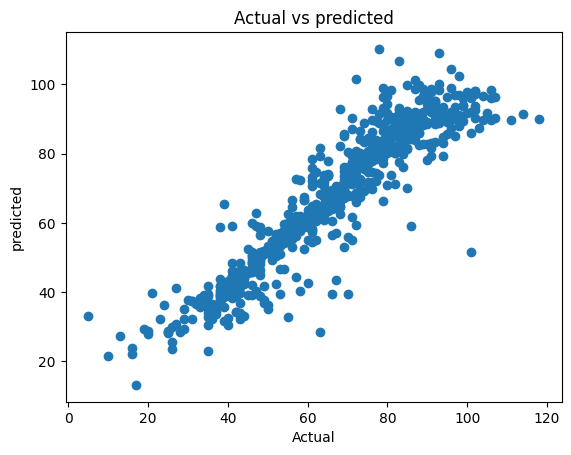

In [61]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [62]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 2ms/step


,Actual,predict,differences
898,57,60.184566,-3.184566
182,25,28.096519,-3.096519
565,44,45.773766,-1.773766
457,39,42.028404,-3.028404
1852,83,91.760139,-8.760139
568,40,42.266544,-2.266544
1340,71,79.284264,-8.284264
778,48,58.738693,-10.738693
562,43,44.138435,-1.138435
716,58,59.804436,-1.804436


## RNN

In [63]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [64]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 20s 83ms/step - loss: 2683.0388 - mae: 45.1251 - val_loss: 328.8212 - val_mae: 14.7569
Epoch 2/2000
37/37 [==============================] - 1s 19ms/step - loss: 732.6279 - mae: 21.7546 - val_loss: 529.3051 - val_mae: 20.5275
Epoch 3/2000
37/37 [==============================] - 1s 20ms/step - loss: 544.3908 - mae: 18.3800 - val_loss: 411.4384 - val_mae: 18.0082
Epoch 4/2000
37/37 [==============================] - 1s 20ms/step - loss: 471.1328 - mae: 16.8809 - val_loss: 597.8023 - val_mae: 22.1143
Epoch 5/2000
37/37 [==============================] - 1s 20ms/step - loss: 453.0933 - mae: 16.5824 - val_loss: 290.2383 - val_mae: 14.4382
Epoch 6/2000
37/37 [==============================] - 1s 21ms/step - loss: 413.8485 - mae: 15.9369 - val_loss: 451.8468 - val_mae: 18.9514
Epoch 7/2000
37/37 [==============================] - 1s 20ms/step - loss: 368.4306 - mae: 15.2371 - val_loss: 558.1646 - val_mae: 21.0725
Epoch 8/2000
37/37 [=====

Epoch 60/2000
37/37 [==============================] - 1s 22ms/step - loss: 176.7566 - mae: 10.4092 - val_loss: 129.4125 - val_mae: 8.8841
Epoch 61/2000
37/37 [==============================] - 1s 21ms/step - loss: 162.1323 - mae: 9.8853 - val_loss: 117.6435 - val_mae: 8.3056
Epoch 62/2000
37/37 [==============================] - 1s 20ms/step - loss: 170.6385 - mae: 10.3159 - val_loss: 82.8077 - val_mae: 6.5052
Epoch 63/2000
37/37 [==============================] - 1s 21ms/step - loss: 164.4314 - mae: 9.8379 - val_loss: 157.2021 - val_mae: 10.2233
Epoch 64/2000
37/37 [==============================] - 1s 20ms/step - loss: 166.7394 - mae: 9.8850 - val_loss: 92.1158 - val_mae: 6.7681
Epoch 65/2000
37/37 [==============================] - 1s 21ms/step - loss: 170.4149 - mae: 10.0791 - val_loss: 130.4134 - val_mae: 8.7293
Epoch 66/2000
37/37 [==============================] - 1s 20ms/step - loss: 153.0982 - mae: 9.6942 - val_loss: 106.1201 - val_mae: 7.8084
Epoch 67/2000
37/37 [===========

37/37 [==============================] - 1s 20ms/step - loss: 131.6448 - mae: 8.6673 - val_loss: 83.1689 - val_mae: 6.9834
Epoch 179/2000
37/37 [==============================] - 1s 21ms/step - loss: 129.8028 - mae: 8.6670 - val_loss: 69.0159 - val_mae: 6.1146
Epoch 180/2000
37/37 [==============================] - 1s 20ms/step - loss: 136.6837 - mae: 8.9633 - val_loss: 121.4218 - val_mae: 9.1172
Epoch 181/2000
37/37 [==============================] - 1s 20ms/step - loss: 127.7961 - mae: 8.6538 - val_loss: 68.7630 - val_mae: 6.0978
Epoch 182/2000
37/37 [==============================] - 1s 22ms/step - loss: 131.3311 - mae: 8.7525 - val_loss: 66.9185 - val_mae: 6.0283
Epoch 183/2000
37/37 [==============================] - 1s 21ms/step - loss: 143.2052 - mae: 9.1854 - val_loss: 53.0176 - val_mae: 5.0728
Epoch 184/2000
37/37 [==============================] - 1s 21ms/step - loss: 129.9527 - mae: 8.7210 - val_loss: 75.4297 - val_mae: 6.6185
Epoch 185/2000
37/37 [==========================

37/37 [==============================] - 1s 20ms/step - loss: 121.7968 - mae: 8.4238 - val_loss: 53.5478 - val_mae: 5.2051
Epoch 297/2000
37/37 [==============================] - 1s 21ms/step - loss: 119.8004 - mae: 8.3721 - val_loss: 63.7688 - val_mae: 5.8763
Epoch 298/2000
37/37 [==============================] - 1s 20ms/step - loss: 115.5408 - mae: 8.3178 - val_loss: 48.5961 - val_mae: 4.7278
Epoch 299/2000
37/37 [==============================] - 1s 21ms/step - loss: 108.2046 - mae: 8.0275 - val_loss: 49.9308 - val_mae: 4.6359
Epoch 300/2000
37/37 [==============================] - 1s 20ms/step - loss: 114.4986 - mae: 8.2399 - val_loss: 64.5816 - val_mae: 5.8628
Epoch 301/2000
37/37 [==============================] - 1s 21ms/step - loss: 116.6518 - mae: 8.3765 - val_loss: 66.4671 - val_mae: 6.2472
Epoch 302/2000
37/37 [==============================] - 1s 21ms/step - loss: 115.8400 - mae: 8.1737 - val_loss: 52.2161 - val_mae: 4.9287
Epoch 303/2000
37/37 [===========================

37/37 [==============================] - 1s 21ms/step - loss: 102.2278 - mae: 7.7616 - val_loss: 58.8825 - val_mae: 5.2278
Epoch 500/2000
37/37 [==============================] - 1s 20ms/step - loss: 101.6680 - mae: 7.6972 - val_loss: 58.8616 - val_mae: 5.3395
Epoch 501/2000
37/37 [==============================] - 1s 20ms/step - loss: 104.0961 - mae: 7.8411 - val_loss: 55.8073 - val_mae: 5.1000
Epoch 502/2000
37/37 [==============================] - 1s 21ms/step - loss: 103.1154 - mae: 7.7274 - val_loss: 50.4073 - val_mae: 4.6487
Epoch 503/2000
37/37 [==============================] - 1s 21ms/step - loss: 101.5845 - mae: 7.8142 - val_loss: 49.9347 - val_mae: 4.5181
Epoch 504/2000
37/37 [==============================] - 1s 21ms/step - loss: 109.6243 - mae: 8.0324 - val_loss: 67.2802 - val_mae: 6.0929
Epoch 505/2000
37/37 [==============================] - 1s 20ms/step - loss: 103.7772 - mae: 7.7892 - val_loss: 54.4993 - val_mae: 4.7949
Epoch 506/2000
37/37 [===========================

Epoch 741/2000
37/37 [==============================] - 1s 21ms/step - loss: 93.4100 - mae: 7.3124 - val_loss: 49.5138 - val_mae: 4.4094
Epoch 742/2000
37/37 [==============================] - 1s 20ms/step - loss: 102.0275 - mae: 7.6182 - val_loss: 69.0752 - val_mae: 5.9475
Epoch 743/2000
37/37 [==============================] - 1s 20ms/step - loss: 91.0873 - mae: 7.2465 - val_loss: 52.8167 - val_mae: 4.8042
Epoch 744/2000
37/37 [==============================] - 1s 20ms/step - loss: 88.5278 - mae: 7.2770 - val_loss: 69.5422 - val_mae: 6.4185
Epoch 745/2000
37/37 [==============================] - 1s 22ms/step - loss: 87.5618 - mae: 7.1467 - val_loss: 67.6366 - val_mae: 6.0437
Epoch 746/2000
37/37 [==============================] - 1s 24ms/step - loss: 93.6543 - mae: 7.3172 - val_loss: 51.0510 - val_mae: 4.8547
Epoch 747/2000
37/37 [==============================] - 1s 26ms/step - loss: 99.0866 - mae: 7.5284 - val_loss: 51.7200 - val_mae: 4.7346
Epoch 748/2000
37/37 [==================

Epoch 801/2000
37/37 [==============================] - 1s 20ms/step - loss: 99.8897 - mae: 7.6285 - val_loss: 65.2689 - val_mae: 5.7574
Epoch 802/2000
37/37 [==============================] - 1s 20ms/step - loss: 91.5148 - mae: 7.4055 - val_loss: 67.1444 - val_mae: 6.1393
Epoch 803/2000
37/37 [==============================] - 1s 20ms/step - loss: 81.6008 - mae: 6.9598 - val_loss: 52.8677 - val_mae: 4.6111
Epoch 804/2000
37/37 [==============================] - 1s 21ms/step - loss: 84.7539 - mae: 7.0811 - val_loss: 47.4240 - val_mae: 4.3373
Epoch 805/2000
37/37 [==============================] - 1s 20ms/step - loss: 90.2637 - mae: 7.2562 - val_loss: 54.3969 - val_mae: 4.7146
Epoch 806/2000
37/37 [==============================] - 1s 20ms/step - loss: 88.0897 - mae: 7.2008 - val_loss: 52.7850 - val_mae: 4.7479
Epoch 807/2000
37/37 [==============================] - 1s 20ms/step - loss: 90.0258 - mae: 7.1258 - val_loss: 66.0053 - val_mae: 5.8600
Epoch 808/2000
37/37 [===================

Epoch 861/2000
37/37 [==============================] - 1s 23ms/step - loss: 92.0551 - mae: 7.0877 - val_loss: 80.2331 - val_mae: 6.6836
Epoch 862/2000
37/37 [==============================] - 1s 24ms/step - loss: 85.7314 - mae: 7.0417 - val_loss: 65.7807 - val_mae: 5.6625
Epoch 863/2000
37/37 [==============================] - 1s 21ms/step - loss: 80.9317 - mae: 6.7609 - val_loss: 61.7572 - val_mae: 5.4441
Epoch 864/2000
37/37 [==============================] - 1s 26ms/step - loss: 86.7000 - mae: 6.9932 - val_loss: 57.0007 - val_mae: 5.1299
Epoch 865/2000
37/37 [==============================] - 1s 26ms/step - loss: 87.4342 - mae: 7.0627 - val_loss: 47.4629 - val_mae: 4.4585
Epoch 866/2000
37/37 [==============================] - 1s 22ms/step - loss: 84.9353 - mae: 6.9470 - val_loss: 52.4138 - val_mae: 4.7644
Epoch 867/2000
37/37 [==============================] - 1s 23ms/step - loss: 84.8487 - mae: 6.9065 - val_loss: 56.8260 - val_mae: 5.0129
Epoch 868/2000
37/37 [===================

Epoch 921/2000
37/37 [==============================] - 1s 23ms/step - loss: 78.9563 - mae: 6.7362 - val_loss: 57.3048 - val_mae: 5.0364
Epoch 922/2000
37/37 [==============================] - 1s 25ms/step - loss: 83.6680 - mae: 6.8387 - val_loss: 51.0353 - val_mae: 4.4661
Epoch 923/2000
37/37 [==============================] - 1s 23ms/step - loss: 83.2091 - mae: 7.0103 - val_loss: 52.1831 - val_mae: 4.7764
Epoch 924/2000
37/37 [==============================] - 1s 21ms/step - loss: 80.7030 - mae: 6.8374 - val_loss: 66.8527 - val_mae: 5.9887
Epoch 925/2000
37/37 [==============================] - 1s 21ms/step - loss: 88.0533 - mae: 7.0862 - val_loss: 64.0149 - val_mae: 5.7164
Epoch 926/2000
37/37 [==============================] - 1s 23ms/step - loss: 88.4861 - mae: 7.0490 - val_loss: 55.0085 - val_mae: 4.7123
Epoch 927/2000
37/37 [==============================] - 1s 22ms/step - loss: 84.2663 - mae: 6.9970 - val_loss: 63.2885 - val_mae: 5.6975
Epoch 928/2000
37/37 [===================

Epoch 981/2000
37/37 [==============================] - 1s 21ms/step - loss: 88.2657 - mae: 7.0317 - val_loss: 62.1131 - val_mae: 5.4958
Epoch 982/2000
37/37 [==============================] - 1s 20ms/step - loss: 84.4263 - mae: 6.9296 - val_loss: 54.9654 - val_mae: 4.8891
Epoch 983/2000
37/37 [==============================] - 1s 21ms/step - loss: 80.6565 - mae: 6.7348 - val_loss: 49.8801 - val_mae: 4.3931
Epoch 984/2000
37/37 [==============================] - 1s 21ms/step - loss: 84.0759 - mae: 6.7932 - val_loss: 68.8419 - val_mae: 5.9592
Epoch 985/2000
37/37 [==============================] - 1s 21ms/step - loss: 78.4380 - mae: 6.7762 - val_loss: 59.2150 - val_mae: 5.1181
Epoch 986/2000
37/37 [==============================] - 1s 21ms/step - loss: 78.3971 - mae: 6.6466 - val_loss: 56.7408 - val_mae: 4.9268
Epoch 987/2000
37/37 [==============================] - 1s 22ms/step - loss: 80.3097 - mae: 6.6890 - val_loss: 58.9563 - val_mae: 5.3007
Epoch 988/2000
37/37 [===================

37/37 [==============================] - 1s 21ms/step - loss: 80.0000 - mae: 6.8905 - val_loss: 72.0541 - val_mae: 6.5336
Epoch 1100/2000
37/37 [==============================] - 1s 20ms/step - loss: 76.6994 - mae: 6.6621 - val_loss: 49.9525 - val_mae: 4.3314
Epoch 1101/2000
37/37 [==============================] - 1s 20ms/step - loss: 73.2744 - mae: 6.5287 - val_loss: 61.8150 - val_mae: 5.5750
Epoch 1102/2000
37/37 [==============================] - 1s 20ms/step - loss: 72.9408 - mae: 6.4602 - val_loss: 54.2629 - val_mae: 4.5509
Epoch 1103/2000
37/37 [==============================] - 1s 21ms/step - loss: 81.5527 - mae: 6.8021 - val_loss: 65.9059 - val_mae: 5.8178
Epoch 1104/2000
37/37 [==============================] - 1s 21ms/step - loss: 75.5301 - mae: 6.5825 - val_loss: 58.7622 - val_mae: 4.8634
Epoch 1105/2000
37/37 [==============================] - 1s 21ms/step - loss: 74.9829 - mae: 6.5479 - val_loss: 66.3090 - val_mae: 5.9350
Epoch 1106/2000
37/37 [===========================

37/37 [==============================] - 1s 18ms/step - loss: 74.3076 - mae: 6.4310 - val_loss: 64.6729 - val_mae: 5.3091
Epoch 1218/2000
37/37 [==============================] - 1s 17ms/step - loss: 76.1736 - mae: 6.6449 - val_loss: 54.5956 - val_mae: 4.7493
Epoch 1219/2000
37/37 [==============================] - 1s 16ms/step - loss: 65.4972 - mae: 6.1619 - val_loss: 54.6366 - val_mae: 4.7207
Epoch 1220/2000
37/37 [==============================] - 1s 16ms/step - loss: 74.5394 - mae: 6.4858 - val_loss: 58.9486 - val_mae: 5.2343
Epoch 1221/2000
37/37 [==============================] - 1s 16ms/step - loss: 71.1769 - mae: 6.3094 - val_loss: 52.4041 - val_mae: 4.4533
Epoch 1222/2000
37/37 [==============================] - 1s 16ms/step - loss: 72.2163 - mae: 6.4166 - val_loss: 53.7517 - val_mae: 4.7046
Epoch 1223/2000
37/37 [==============================] - 1s 16ms/step - loss: 81.0289 - mae: 6.7887 - val_loss: 58.9569 - val_mae: 4.9849
Epoch 1224/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 73.6052 - mae: 6.3344 - val_loss: 65.6302 - val_mae: 5.4880
Epoch 1336/2000
37/37 [==============================] - 1s 16ms/step - loss: 74.5879 - mae: 6.4922 - val_loss: 63.8255 - val_mae: 5.3147
Epoch 1337/2000
37/37 [==============================] - 1s 17ms/step - loss: 69.8303 - mae: 6.2641 - val_loss: 53.0409 - val_mae: 4.4216
Epoch 1338/2000
37/37 [==============================] - 1s 17ms/step - loss: 73.6559 - mae: 6.4944 - val_loss: 57.6150 - val_mae: 4.6140
Epoch 1339/2000
37/37 [==============================] - 1s 16ms/step - loss: 72.1013 - mae: 6.2407 - val_loss: 59.6181 - val_mae: 5.0240
Epoch 1340/2000
37/37 [==============================] - 1s 16ms/step - loss: 68.9433 - mae: 6.0470 - val_loss: 60.5890 - val_mae: 5.3233
Epoch 1341/2000
37/37 [==============================] - 1s 16ms/step - loss: 77.8348 - mae: 6.5156 - val_loss: 54.6776 - val_mae: 4.5010
Epoch 1342/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 69.4820 - mae: 6.2569 - val_loss: 57.4153 - val_mae: 4.8672
Epoch 1454/2000
37/37 [==============================] - 1s 17ms/step - loss: 69.8491 - mae: 6.1427 - val_loss: 56.6530 - val_mae: 4.5698
Epoch 1455/2000
37/37 [==============================] - 1s 18ms/step - loss: 69.2063 - mae: 6.2454 - val_loss: 53.9413 - val_mae: 4.7075
Epoch 1456/2000
37/37 [==============================] - 1s 16ms/step - loss: 69.1383 - mae: 6.3249 - val_loss: 55.2166 - val_mae: 4.5728
Epoch 1457/2000
37/37 [==============================] - 1s 16ms/step - loss: 70.9635 - mae: 6.3625 - val_loss: 58.9651 - val_mae: 4.6802
Epoch 1458/2000
37/37 [==============================] - 1s 16ms/step - loss: 68.6971 - mae: 6.2431 - val_loss: 61.5902 - val_mae: 5.3472
Epoch 1459/2000
37/37 [==============================] - 1s 15ms/step - loss: 72.5818 - mae: 6.3007 - val_loss: 63.2793 - val_mae: 5.1966
Epoch 1460/2000
37/37 [===========================

37/37 [==============================] - 1s 14ms/step - loss: 61.5958 - mae: 5.9004 - val_loss: 59.2534 - val_mae: 4.6597
Epoch 1572/2000
37/37 [==============================] - 0s 13ms/step - loss: 64.7303 - mae: 6.0428 - val_loss: 60.9350 - val_mae: 4.8349
Epoch 1573/2000
37/37 [==============================] - 1s 14ms/step - loss: 60.2604 - mae: 5.7399 - val_loss: 60.3562 - val_mae: 4.9062
Epoch 1574/2000
37/37 [==============================] - 1s 14ms/step - loss: 64.1962 - mae: 5.9793 - val_loss: 58.2117 - val_mae: 4.9110
Epoch 1575/2000
37/37 [==============================] - 1s 14ms/step - loss: 67.3105 - mae: 6.0082 - val_loss: 70.3017 - val_mae: 5.9906
Epoch 1576/2000
37/37 [==============================] - 1s 14ms/step - loss: 68.0486 - mae: 6.0727 - val_loss: 55.7402 - val_mae: 4.5154
Epoch 1577/2000
37/37 [==============================] - 1s 14ms/step - loss: 59.7436 - mae: 5.7586 - val_loss: 66.5815 - val_mae: 5.6930
Epoch 1578/2000
37/37 [===========================

37/37 [==============================] - 0s 12ms/step - loss: 58.6319 - mae: 5.7498 - val_loss: 54.4247 - val_mae: 4.6862
Epoch 1690/2000
37/37 [==============================] - 0s 12ms/step - loss: 64.1029 - mae: 6.0450 - val_loss: 54.5065 - val_mae: 4.4440
Epoch 1691/2000
37/37 [==============================] - 0s 12ms/step - loss: 63.2197 - mae: 5.9198 - val_loss: 60.5309 - val_mae: 4.7815
Epoch 1692/2000
37/37 [==============================] - 0s 12ms/step - loss: 56.5024 - mae: 5.6488 - val_loss: 60.5256 - val_mae: 4.6947
Epoch 1693/2000
37/37 [==============================] - 0s 12ms/step - loss: 61.1710 - mae: 5.9063 - val_loss: 57.8561 - val_mae: 4.5689
Epoch 1694/2000
37/37 [==============================] - 0s 12ms/step - loss: 60.4462 - mae: 5.8282 - val_loss: 55.9310 - val_mae: 4.4810
Epoch 1695/2000
37/37 [==============================] - 0s 12ms/step - loss: 59.4626 - mae: 5.6835 - val_loss: 58.8063 - val_mae: 4.5893
Epoch 1696/2000
37/37 [===========================

37/37 [==============================] - 0s 12ms/step - loss: 62.6228 - mae: 5.8525 - val_loss: 57.6083 - val_mae: 4.5184
Epoch 1808/2000
37/37 [==============================] - 0s 12ms/step - loss: 54.9747 - mae: 5.4679 - val_loss: 60.9938 - val_mae: 4.8962
Epoch 1809/2000
37/37 [==============================] - 0s 12ms/step - loss: 52.7146 - mae: 5.5077 - val_loss: 62.5463 - val_mae: 5.0380
Epoch 1810/2000
37/37 [==============================] - 0s 13ms/step - loss: 66.5473 - mae: 5.9808 - val_loss: 60.1079 - val_mae: 4.9299
Epoch 1811/2000
37/37 [==============================] - 0s 13ms/step - loss: 60.6575 - mae: 5.7002 - val_loss: 56.1199 - val_mae: 4.8433
Epoch 1812/2000
37/37 [==============================] - 0s 12ms/step - loss: 59.1550 - mae: 5.7595 - val_loss: 57.7409 - val_mae: 4.6874
Epoch 1813/2000
37/37 [==============================] - 0s 12ms/step - loss: 60.3226 - mae: 5.7350 - val_loss: 58.2642 - val_mae: 4.8656
Epoch 1814/2000
37/37 [===========================

37/37 [==============================] - 1s 14ms/step - loss: 53.5691 - mae: 5.3671 - val_loss: 65.6675 - val_mae: 5.3043
Epoch 1926/2000
37/37 [==============================] - 1s 14ms/step - loss: 57.0839 - mae: 5.5319 - val_loss: 58.2230 - val_mae: 4.6335
Epoch 1927/2000
37/37 [==============================] - 1s 14ms/step - loss: 58.0411 - mae: 5.5735 - val_loss: 64.7480 - val_mae: 5.2316
Epoch 1928/2000
37/37 [==============================] - 1s 14ms/step - loss: 53.1831 - mae: 5.4870 - val_loss: 67.9720 - val_mae: 5.5004
Epoch 1929/2000
37/37 [==============================] - 1s 14ms/step - loss: 53.4047 - mae: 5.3458 - val_loss: 67.4143 - val_mae: 5.3241
Epoch 1930/2000
37/37 [==============================] - 1s 14ms/step - loss: 54.9368 - mae: 5.4016 - val_loss: 66.3609 - val_mae: 5.3743
Epoch 1931/2000
37/37 [==============================] - 1s 14ms/step - loss: 51.5668 - mae: 5.3413 - val_loss: 60.8853 - val_mae: 4.8164
Epoch 1932/2000
37/37 [===========================

In [65]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

23/23 [==============================] - 1s 4ms/step


0.8270824433601692

In [66]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 534ms/step
Prediction: 56.871402740478516


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 4ms/step
mean squired error: 69.4476750045481
mean absolute error: 5.442089115538183


23/23 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Actual vs predicted')

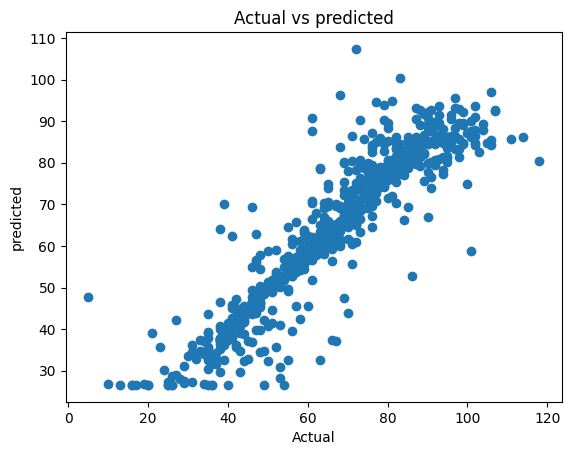

In [68]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [69]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 4ms/step


,Actual,predict,differences
898,57,56.494358,0.505642
182,25,26.590031,-1.590031
565,44,43.114342,0.885658
457,39,40.090393,-1.090393
1852,83,80.743385,2.256615
568,40,39.571213,0.428787
1340,71,60.549854,10.450146
778,48,57.734932,-9.734932
562,43,43.260201,-0.260201
716,58,55.780380,2.219620


## keras tuner with dense

In [70]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_564\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [71]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [72]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [73]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [74]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 6ms/step - loss: 41.7180 - mean_absolute_error: 41.7180 - val_loss: 9.2733 - val_mean_absolute_error: 9.2733
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.8189 - mean_absolute_error: 7.8189 - val_loss: 6.4471 - val_mean_absolute_error: 6.4471
Epoch 3/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.2606 - mean_absolute_error: 7.2606 - val_loss: 12.1680 - val_mean_absolute_error: 12.1680
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.3727 - mean_absolute_error: 7.3727 - val_loss: 5.8622 - val_mean_absolute_error: 5.8622
Epoch 5/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.4561 - mean_absolute_error: 7.4561 - val_loss: 6.0610 - val_mean_absolute_error: 6.0610
Epoch 6/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3547 - mean_absolute_error: 6.3547 - val_loss: 6.8114 - val_mean_absolute_error: 6.8114
Epoch 7/2000

Epoch 51/2000
37/37 [==============================] - 0s 3ms/step - loss: 5.6589 - mean_absolute_error: 5.6589 - val_loss: 7.9959 - val_mean_absolute_error: 7.9959
Epoch 52/2000
37/37 [==============================] - 0s 2ms/step - loss: 5.9466 - mean_absolute_error: 5.9466 - val_loss: 6.7183 - val_mean_absolute_error: 6.7183
Epoch 53/2000
37/37 [==============================] - 0s 3ms/step - loss: 5.3661 - mean_absolute_error: 5.3661 - val_loss: 5.6974 - val_mean_absolute_error: 5.6974
Epoch 54/2000
37/37 [==============================] - 0s 2ms/step - loss: 5.8636 - mean_absolute_error: 5.8636 - val_loss: 7.6652 - val_mean_absolute_error: 7.6652
Epoch 55/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.5884 - mean_absolute_error: 6.5884 - val_loss: 6.7530 - val_mean_absolute_error: 6.7530
Epoch 56/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.7280 - mean_absolute_error: 6.7280 - val_loss: 6.7299 - val_mean_absolute_error: 6.7299
Epoch 57/2

37/37 [==============================] - 0s 2ms/step - loss: 6.3112 - mean_absolute_error: 6.3112 - val_loss: 6.5684 - val_mean_absolute_error: 6.5684
Epoch 150/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3125 - mean_absolute_error: 6.3125 - val_loss: 7.5197 - val_mean_absolute_error: 7.5197
Epoch 151/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.9437 - mean_absolute_error: 6.9437 - val_loss: 6.8625 - val_mean_absolute_error: 6.8625
Epoch 152/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4618 - mean_absolute_error: 6.4618 - val_loss: 8.5860 - val_mean_absolute_error: 8.5860
Epoch 153/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1806 - mean_absolute_error: 6.1806 - val_loss: 6.3501 - val_mean_absolute_error: 6.3501
Epoch 154/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.0893 - mean_absolute_error: 6.0893 - val_loss: 5.9255 - val_mean_absolute_error: 5.9255
Epoch 155/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.7327 - mean_absolute_error: 6.7327 - val_loss: 6.7189 - val_mean_absolute_error: 6.7189
Epoch 248/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.7665 - mean_absolute_error: 6.7665 - val_loss: 6.6401 - val_mean_absolute_error: 6.6401
Epoch 249/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.0792 - mean_absolute_error: 6.0792 - val_loss: 6.6459 - val_mean_absolute_error: 6.6459
Epoch 250/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3153 - mean_absolute_error: 6.3153 - val_loss: 6.4450 - val_mean_absolute_error: 6.4450
Epoch 251/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2023 - mean_absolute_error: 6.2023 - val_loss: 6.5189 - val_mean_absolute_error: 6.5189
Epoch 252/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.7050 - mean_absolute_error: 6.7050 - val_loss: 6.3061 - val_mean_absolute_error: 6.3061
Epoch 253/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.7359 - mean_absolute_error: 6.7359 - val_loss: 6.6060 - val_mean_absolute_error: 6.6060
Epoch 346/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3207 - mean_absolute_error: 6.3207 - val_loss: 7.6487 - val_mean_absolute_error: 7.6487
Epoch 347/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2012 - mean_absolute_error: 6.2012 - val_loss: 7.0496 - val_mean_absolute_error: 7.0496
Epoch 348/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2091 - mean_absolute_error: 6.2091 - val_loss: 6.4358 - val_mean_absolute_error: 6.4358
Epoch 349/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.5811 - mean_absolute_error: 6.5811 - val_loss: 6.9510 - val_mean_absolute_error: 6.9510
Epoch 350/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.2099 - mean_absolute_error: 7.2099 - val_loss: 6.3813 - val_mean_absolute_error: 6.3813
Epoch 351/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.1606 - mean_absolute_error: 6.1606 - val_loss: 6.4382 - val_mean_absolute_error: 6.4382
Epoch 444/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3052 - mean_absolute_error: 6.3052 - val_loss: 7.5916 - val_mean_absolute_error: 7.5916
Epoch 445/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.7313 - mean_absolute_error: 6.7313 - val_loss: 6.3302 - val_mean_absolute_error: 6.3302
Epoch 446/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4891 - mean_absolute_error: 6.4891 - val_loss: 6.3680 - val_mean_absolute_error: 6.3680
Epoch 447/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2517 - mean_absolute_error: 6.2517 - val_loss: 6.6283 - val_mean_absolute_error: 6.6283
Epoch 448/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3677 - mean_absolute_error: 6.3677 - val_loss: 6.3326 - val_mean_absolute_error: 6.3326
Epoch 449/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 6.4029 - mean_absolute_error: 6.4029 - val_loss: 6.8213 - val_mean_absolute_error: 6.8213
Epoch 542/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3103 - mean_absolute_error: 6.3103 - val_loss: 6.3271 - val_mean_absolute_error: 6.3271
Epoch 543/2000
37/37 [==============================] - 0s 4ms/step - loss: 6.2799 - mean_absolute_error: 6.2799 - val_loss: 6.6510 - val_mean_absolute_error: 6.6510
Epoch 544/2000
37/37 [==============================] - 0s 4ms/step - loss: 6.0628 - mean_absolute_error: 6.0628 - val_loss: 6.3469 - val_mean_absolute_error: 6.3469
Epoch 545/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2545 - mean_absolute_error: 6.2545 - val_loss: 8.7524 - val_mean_absolute_error: 8.7524
Epoch 546/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3446 - mean_absolute_error: 6.3446 - val_loss: 6.4001 - val_mean_absolute_error: 6.4001
Epoch 547/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.5558 - mean_absolute_error: 6.5558 - val_loss: 6.9058 - val_mean_absolute_error: 6.9058
Epoch 640/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1632 - mean_absolute_error: 6.1632 - val_loss: 6.9712 - val_mean_absolute_error: 6.9712
Epoch 641/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1097 - mean_absolute_error: 6.1097 - val_loss: 6.8808 - val_mean_absolute_error: 6.8808
Epoch 642/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.5404 - mean_absolute_error: 6.5404 - val_loss: 6.5195 - val_mean_absolute_error: 6.5195
Epoch 643/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.4925 - mean_absolute_error: 6.4925 - val_loss: 7.0962 - val_mean_absolute_error: 7.0962
Epoch 644/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.6609 - mean_absolute_error: 6.6609 - val_loss: 6.8361 - val_mean_absolute_error: 6.8361
Epoch 645/2000
37/3

37/37 [==============================] - 0s 2ms/step - loss: 6.6190 - mean_absolute_error: 6.6190 - val_loss: 6.3746 - val_mean_absolute_error: 6.3746
Epoch 738/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2826 - mean_absolute_error: 6.2826 - val_loss: 6.5577 - val_mean_absolute_error: 6.5577
Epoch 739/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.1380 - mean_absolute_error: 6.1380 - val_loss: 6.5911 - val_mean_absolute_error: 6.5911
Epoch 740/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4562 - mean_absolute_error: 6.4562 - val_loss: 6.2810 - val_mean_absolute_error: 6.2810
Epoch 741/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2298 - mean_absolute_error: 6.2298 - val_loss: 6.7183 - val_mean_absolute_error: 6.7183
Epoch 742/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.5810 - mean_absolute_error: 6.5810 - val_loss: 6.3401 - val_mean_absolute_error: 6.3401
Epoch 743/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.7856 - mean_absolute_error: 6.7856 - val_loss: 6.7660 - val_mean_absolute_error: 6.7660
Epoch 836/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4199 - mean_absolute_error: 6.4199 - val_loss: 6.8667 - val_mean_absolute_error: 6.8667
Epoch 837/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1942 - mean_absolute_error: 6.1942 - val_loss: 6.3889 - val_mean_absolute_error: 6.3889
Epoch 838/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.7304 - mean_absolute_error: 6.7304 - val_loss: 6.3262 - val_mean_absolute_error: 6.3262
Epoch 839/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.3499 - mean_absolute_error: 6.3499 - val_loss: 7.0628 - val_mean_absolute_error: 7.0628
Epoch 840/2000
37/37 [==============================] - 0s 2ms/step - loss: 7.1345 - mean_absolute_error: 7.1345 - val_loss: 8.0658 - val_mean_absolute_error: 8.0658
Epoch 841/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 6.0800 - mean_absolute_error: 6.0800 - val_loss: 6.3181 - val_mean_absolute_error: 6.3181
Epoch 934/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1617 - mean_absolute_error: 6.1617 - val_loss: 6.3980 - val_mean_absolute_error: 6.3980
Epoch 935/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1593 - mean_absolute_error: 6.1593 - val_loss: 6.4301 - val_mean_absolute_error: 6.4301
Epoch 936/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1047 - mean_absolute_error: 6.1047 - val_loss: 6.6411 - val_mean_absolute_error: 6.6411
Epoch 937/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3196 - mean_absolute_error: 6.3196 - val_loss: 6.4511 - val_mean_absolute_error: 6.4511
Epoch 938/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.6291 - mean_absolute_error: 6.6291 - val_loss: 7.0210 - val_mean_absolute_error: 7.0210
Epoch 939/2000
37/3

37/37 [==============================] - 0s 2ms/step - loss: 6.3113 - mean_absolute_error: 6.3113 - val_loss: 6.2667 - val_mean_absolute_error: 6.2667
Epoch 1032/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2845 - mean_absolute_error: 6.2845 - val_loss: 6.6593 - val_mean_absolute_error: 6.6593
Epoch 1033/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2755 - mean_absolute_error: 6.2755 - val_loss: 6.7878 - val_mean_absolute_error: 6.7878
Epoch 1034/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.4144 - mean_absolute_error: 6.4144 - val_loss: 6.2841 - val_mean_absolute_error: 6.2841
Epoch 1035/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.1441 - mean_absolute_error: 6.1441 - val_loss: 6.8479 - val_mean_absolute_error: 6.8479
Epoch 1036/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2360 - mean_absolute_error: 6.2360 - val_loss: 6.4668 - val_mean_absolute_error: 6.4668
Epoch 1037/200

37/37 [==============================] - 0s 2ms/step - loss: 6.3779 - mean_absolute_error: 6.3779 - val_loss: 6.6139 - val_mean_absolute_error: 6.6139
Epoch 1130/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.0974 - mean_absolute_error: 6.0974 - val_loss: 6.6016 - val_mean_absolute_error: 6.6016
Epoch 1131/2000
37/37 [==============================] - 0s 2ms/step - loss: 7.8063 - mean_absolute_error: 7.8063 - val_loss: 6.4578 - val_mean_absolute_error: 6.4578
Epoch 1132/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.9667 - mean_absolute_error: 6.9667 - val_loss: 6.5007 - val_mean_absolute_error: 6.5007
Epoch 1133/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2344 - mean_absolute_error: 6.2344 - val_loss: 6.5859 - val_mean_absolute_error: 6.5859
Epoch 1134/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2894 - mean_absolute_error: 6.2894 - val_loss: 7.1280 - val_mean_absolute_error: 7.1280
Epoch 1135/200

37/37 [==============================] - 0s 2ms/step - loss: 6.1351 - mean_absolute_error: 6.1351 - val_loss: 6.4552 - val_mean_absolute_error: 6.4552
Epoch 1228/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1227 - mean_absolute_error: 6.1227 - val_loss: 6.4010 - val_mean_absolute_error: 6.4010
Epoch 1229/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.9081 - mean_absolute_error: 6.9081 - val_loss: 6.4377 - val_mean_absolute_error: 6.4377
Epoch 1230/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2613 - mean_absolute_error: 6.2613 - val_loss: 6.6658 - val_mean_absolute_error: 6.6658
Epoch 1231/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.4447 - mean_absolute_error: 6.4447 - val_loss: 6.9710 - val_mean_absolute_error: 6.9710
Epoch 1232/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3271 - mean_absolute_error: 6.3271 - val_loss: 6.7719 - val_mean_absolute_error: 6.7719
Epoch 1233/200

37/37 [==============================] - 0s 2ms/step - loss: 6.1396 - mean_absolute_error: 6.1396 - val_loss: 6.9793 - val_mean_absolute_error: 6.9793
Epoch 1326/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2166 - mean_absolute_error: 6.2166 - val_loss: 6.4063 - val_mean_absolute_error: 6.4063
Epoch 1327/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.3150 - mean_absolute_error: 6.3150 - val_loss: 6.2921 - val_mean_absolute_error: 6.2921
Epoch 1328/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.4297 - mean_absolute_error: 6.4297 - val_loss: 6.5309 - val_mean_absolute_error: 6.5309
Epoch 1329/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3671 - mean_absolute_error: 6.3671 - val_loss: 6.2709 - val_mean_absolute_error: 6.2709
Epoch 1330/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2152 - mean_absolute_error: 6.2152 - val_loss: 6.5835 - val_mean_absolute_error: 6.5835
Epoch 1331/200

37/37 [==============================] - 0s 3ms/step - loss: 6.1580 - mean_absolute_error: 6.1580 - val_loss: 7.6356 - val_mean_absolute_error: 7.6356
Epoch 1424/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.7119 - mean_absolute_error: 6.7119 - val_loss: 10.1526 - val_mean_absolute_error: 10.1526
Epoch 1425/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.8298 - mean_absolute_error: 6.8298 - val_loss: 6.4112 - val_mean_absolute_error: 6.4112
Epoch 1426/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1082 - mean_absolute_error: 6.1082 - val_loss: 6.3443 - val_mean_absolute_error: 6.3443
Epoch 1427/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.3367 - mean_absolute_error: 6.3367 - val_loss: 6.3377 - val_mean_absolute_error: 6.3377
Epoch 1428/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.1308 - mean_absolute_error: 6.1308 - val_loss: 6.4980 - val_mean_absolute_error: 6.4980
Epoch 1429/2

37/37 [==============================] - 0s 3ms/step - loss: 6.3098 - mean_absolute_error: 6.3098 - val_loss: 6.3090 - val_mean_absolute_error: 6.3090
Epoch 1522/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2241 - mean_absolute_error: 6.2241 - val_loss: 6.5827 - val_mean_absolute_error: 6.5827
Epoch 1523/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2624 - mean_absolute_error: 6.2624 - val_loss: 6.5799 - val_mean_absolute_error: 6.5799
Epoch 1524/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4195 - mean_absolute_error: 6.4195 - val_loss: 7.2102 - val_mean_absolute_error: 7.2102
Epoch 1525/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.5486 - mean_absolute_error: 6.5486 - val_loss: 6.5019 - val_mean_absolute_error: 6.5019
Epoch 1526/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.1261 - mean_absolute_error: 6.1261 - val_loss: 6.3463 - val_mean_absolute_error: 6.3463
Epoch 1527/200

37/37 [==============================] - 0s 3ms/step - loss: 6.4367 - mean_absolute_error: 6.4367 - val_loss: 6.5607 - val_mean_absolute_error: 6.5607
Epoch 1620/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2870 - mean_absolute_error: 6.2870 - val_loss: 12.3856 - val_mean_absolute_error: 12.3856
Epoch 1621/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.8785 - mean_absolute_error: 6.8785 - val_loss: 6.4875 - val_mean_absolute_error: 6.4875
Epoch 1622/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2582 - mean_absolute_error: 6.2582 - val_loss: 6.9025 - val_mean_absolute_error: 6.9025
Epoch 1623/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2559 - mean_absolute_error: 6.2559 - val_loss: 6.4867 - val_mean_absolute_error: 6.4867
Epoch 1624/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2729 - mean_absolute_error: 6.2729 - val_loss: 6.5949 - val_mean_absolute_error: 6.5949
Epoch 1625/2

37/37 [==============================] - 0s 3ms/step - loss: 7.9825 - mean_absolute_error: 7.9825 - val_loss: 6.4849 - val_mean_absolute_error: 6.4849
Epoch 1718/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.7826 - mean_absolute_error: 6.7826 - val_loss: 7.2443 - val_mean_absolute_error: 7.2443
Epoch 1719/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4084 - mean_absolute_error: 6.4084 - val_loss: 6.4726 - val_mean_absolute_error: 6.4726
Epoch 1720/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.2750 - mean_absolute_error: 6.2750 - val_loss: 7.4487 - val_mean_absolute_error: 7.4487
Epoch 1721/2000
37/37 [==============================] - 0s 3ms/step - loss: 7.3453 - mean_absolute_error: 7.3453 - val_loss: 7.9335 - val_mean_absolute_error: 7.9335
Epoch 1722/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4545 - mean_absolute_error: 6.4545 - val_loss: 7.3648 - val_mean_absolute_error: 7.3648
Epoch 1723/200

37/37 [==============================] - 0s 3ms/step - loss: 6.2500 - mean_absolute_error: 6.2500 - val_loss: 6.8589 - val_mean_absolute_error: 6.8589
Epoch 1816/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.6538 - mean_absolute_error: 6.6538 - val_loss: 8.4839 - val_mean_absolute_error: 8.4839
Epoch 1817/2000
37/37 [==============================] - 0s 2ms/step - loss: 7.0063 - mean_absolute_error: 7.0063 - val_loss: 6.8243 - val_mean_absolute_error: 6.8243
Epoch 1818/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1940 - mean_absolute_error: 6.1940 - val_loss: 7.7313 - val_mean_absolute_error: 7.7313
Epoch 1819/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.4074 - mean_absolute_error: 6.4074 - val_loss: 6.5684 - val_mean_absolute_error: 6.5684
Epoch 1820/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.0899 - mean_absolute_error: 6.0899 - val_loss: 6.4995 - val_mean_absolute_error: 6.4995
Epoch 1821/200

37/37 [==============================] - 0s 3ms/step - loss: 6.7683 - mean_absolute_error: 6.7683 - val_loss: 6.2624 - val_mean_absolute_error: 6.2624
Epoch 1914/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.8725 - mean_absolute_error: 6.8725 - val_loss: 6.8871 - val_mean_absolute_error: 6.8871
Epoch 1915/2000
37/37 [==============================] - 0s 3ms/step - loss: 6.5673 - mean_absolute_error: 6.5673 - val_loss: 6.5339 - val_mean_absolute_error: 6.5339
Epoch 1916/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.5548 - mean_absolute_error: 6.5548 - val_loss: 6.3286 - val_mean_absolute_error: 6.3286
Epoch 1917/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.2484 - mean_absolute_error: 6.2484 - val_loss: 6.3592 - val_mean_absolute_error: 6.3592
Epoch 1918/2000
37/37 [==============================] - 0s 2ms/step - loss: 6.1101 - mean_absolute_error: 6.1101 - val_loss: 6.4188 - val_mean_absolute_error: 6.4188
Epoch 1919/200

In [75]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

23/23 [==============================] - 0s 1ms/step


0.7859777641696518

In [76]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 58ms/step
Prediction: 58.371726989746094


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 1ms/step
mean squired error: 85.9562612757221
mean absolute error: 6.580769402640207


23/23 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

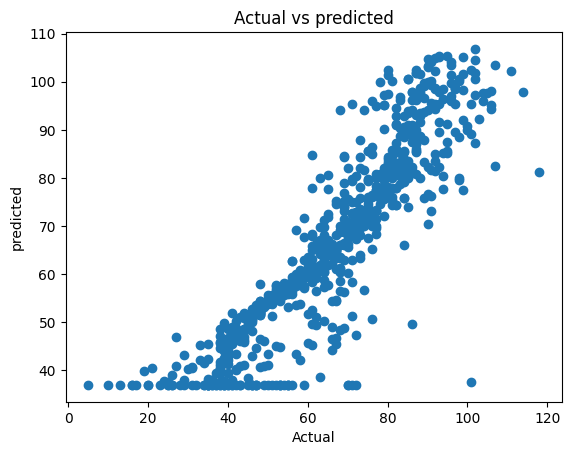

In [78]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [79]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 1ms/step


,Actual,predict,differences
898,57,59.964622,-2.964622
182,25,36.963810,-11.963810
565,44,48.077793,-4.077793
457,39,49.889256,-10.889256
1852,83,82.903419,0.096581
568,40,46.801857,-6.801857
1340,71,62.885612,8.114388
778,48,57.898731,-9.898731
562,43,48.179016,-5.179016
716,58,53.817406,4.182594


## keras tuner with RNN

In [80]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [81]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [82]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [83]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [84]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 2s 26ms/step - loss: 17.2914 - mean_absolute_error: 17.2914 - val_loss: 6.6552 - val_mean_absolute_error: 6.6552
Epoch 2/2000
37/37 [==============================] - 1s 20ms/step - loss: 7.0608 - mean_absolute_error: 7.0608 - val_loss: 6.9673 - val_mean_absolute_error: 6.9673
Epoch 3/2000
37/37 [==============================] - 1s 21ms/step - loss: 7.1251 - mean_absolute_error: 7.1251 - val_loss: 7.7392 - val_mean_absolute_error: 7.7392
Epoch 4/2000
37/37 [==============================] - 1s 20ms/step - loss: 6.6200 - mean_absolute_error: 6.6200 - val_loss: 6.0374 - val_mean_absolute_error: 6.0374
Epoch 5/2000
37/37 [==============================] - 1s 21ms/step - loss: 6.3825 - mean_absolute_error: 6.3825 - val_loss: 7.5293 - val_mean_absolute_error: 7.5293
Epoch 6/2000
37/37 [==============================] - 1s 25ms/step - loss: 6.9435 - mean_absolute_error: 6.9435 - val_loss: 6.8512 - val_mean_absolute_error: 6.8512
Epoch 7/

37/37 [==============================] - 1s 22ms/step - loss: 4.5369 - mean_absolute_error: 4.5369 - val_loss: 4.7227 - val_mean_absolute_error: 4.7227
Epoch 100/2000
37/37 [==============================] - 1s 22ms/step - loss: 4.6379 - mean_absolute_error: 4.6379 - val_loss: 5.0001 - val_mean_absolute_error: 5.0001
Epoch 101/2000
37/37 [==============================] - 1s 22ms/step - loss: 4.9233 - mean_absolute_error: 4.9233 - val_loss: 4.7145 - val_mean_absolute_error: 4.7145
Epoch 102/2000
37/37 [==============================] - 1s 22ms/step - loss: 4.4854 - mean_absolute_error: 4.4854 - val_loss: 4.5511 - val_mean_absolute_error: 4.5511
Epoch 103/2000
37/37 [==============================] - 1s 22ms/step - loss: 4.5998 - mean_absolute_error: 4.5998 - val_loss: 4.6281 - val_mean_absolute_error: 4.6281
Epoch 104/2000
37/37 [==============================] - 1s 22ms/step - loss: 4.4130 - mean_absolute_error: 4.4130 - val_loss: 4.7039 - val_mean_absolute_error: 4.7039
Epoch 105/200

37/37 [==============================] - 1s 27ms/step - loss: 6.0567 - mean_absolute_error: 6.0567 - val_loss: 6.0625 - val_mean_absolute_error: 6.0625
Epoch 198/2000
37/37 [==============================] - 1s 25ms/step - loss: 5.6354 - mean_absolute_error: 5.6354 - val_loss: 5.6614 - val_mean_absolute_error: 5.6614
Epoch 199/2000
37/37 [==============================] - 1s 29ms/step - loss: 5.4344 - mean_absolute_error: 5.4344 - val_loss: 4.8013 - val_mean_absolute_error: 4.8013
Epoch 200/2000
37/37 [==============================] - 1s 26ms/step - loss: 4.7643 - mean_absolute_error: 4.7643 - val_loss: 4.8653 - val_mean_absolute_error: 4.8653
Epoch 201/2000
37/37 [==============================] - 1s 26ms/step - loss: 4.8274 - mean_absolute_error: 4.8274 - val_loss: 5.0940 - val_mean_absolute_error: 5.0940
Epoch 202/2000
37/37 [==============================] - 1s 26ms/step - loss: 4.9907 - mean_absolute_error: 4.9907 - val_loss: 5.1276 - val_mean_absolute_error: 5.1276
Epoch 203/200

37/37 [==============================] - 1s 27ms/step - loss: 4.1657 - mean_absolute_error: 4.1657 - val_loss: 4.5309 - val_mean_absolute_error: 4.5309
Epoch 296/2000
37/37 [==============================] - 1s 26ms/step - loss: 4.1577 - mean_absolute_error: 4.1577 - val_loss: 4.7973 - val_mean_absolute_error: 4.7973
Epoch 297/2000
37/37 [==============================] - 1s 26ms/step - loss: 4.1319 - mean_absolute_error: 4.1319 - val_loss: 4.6379 - val_mean_absolute_error: 4.6379
Epoch 298/2000
37/37 [==============================] - 1s 24ms/step - loss: 3.9404 - mean_absolute_error: 3.9404 - val_loss: 4.7173 - val_mean_absolute_error: 4.7173
Epoch 299/2000
37/37 [==============================] - 1s 23ms/step - loss: 4.0468 - mean_absolute_error: 4.0468 - val_loss: 4.5074 - val_mean_absolute_error: 4.5074
Epoch 300/2000
37/37 [==============================] - 1s 27ms/step - loss: 3.9338 - mean_absolute_error: 3.9338 - val_loss: 4.5051 - val_mean_absolute_error: 4.5051
Epoch 301/200

37/37 [==============================] - 1s 31ms/step - loss: 3.8468 - mean_absolute_error: 3.8468 - val_loss: 4.5450 - val_mean_absolute_error: 4.5450
Epoch 394/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.9395 - mean_absolute_error: 3.9395 - val_loss: 4.6839 - val_mean_absolute_error: 4.6839
Epoch 395/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.9497 - mean_absolute_error: 3.9497 - val_loss: 4.9726 - val_mean_absolute_error: 4.9726
Epoch 396/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.9182 - mean_absolute_error: 3.9182 - val_loss: 4.8437 - val_mean_absolute_error: 4.8437
Epoch 397/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.9477 - mean_absolute_error: 3.9477 - val_loss: 4.7154 - val_mean_absolute_error: 4.7154
Epoch 398/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.8212 - mean_absolute_error: 3.8212 - val_loss: 4.4891 - val_mean_absolute_error: 4.4891
Epoch 399/200

37/37 [==============================] - 1s 29ms/step - loss: 5.1351 - mean_absolute_error: 5.1351 - val_loss: 5.2839 - val_mean_absolute_error: 5.2839
Epoch 492/2000
37/37 [==============================] - 1s 29ms/step - loss: 5.3059 - mean_absolute_error: 5.3059 - val_loss: 5.7455 - val_mean_absolute_error: 5.7455
Epoch 493/2000
37/37 [==============================] - 1s 28ms/step - loss: 5.6480 - mean_absolute_error: 5.6480 - val_loss: 5.9515 - val_mean_absolute_error: 5.9515
Epoch 494/2000
37/37 [==============================] - 1s 30ms/step - loss: 5.2491 - mean_absolute_error: 5.2491 - val_loss: 5.1650 - val_mean_absolute_error: 5.1650
Epoch 495/2000
37/37 [==============================] - 1s 29ms/step - loss: 5.0202 - mean_absolute_error: 5.0202 - val_loss: 5.2767 - val_mean_absolute_error: 5.2767
Epoch 496/2000
37/37 [==============================] - 1s 28ms/step - loss: 4.9855 - mean_absolute_error: 4.9855 - val_loss: 5.1107 - val_mean_absolute_error: 5.1107
Epoch 497/200

37/37 [==============================] - 1s 30ms/step - loss: 4.2694 - mean_absolute_error: 4.2694 - val_loss: 4.6951 - val_mean_absolute_error: 4.6951
Epoch 590/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.3874 - mean_absolute_error: 4.3874 - val_loss: 4.6898 - val_mean_absolute_error: 4.6898
Epoch 591/2000
37/37 [==============================] - 1s 29ms/step - loss: 4.2958 - mean_absolute_error: 4.2958 - val_loss: 4.7038 - val_mean_absolute_error: 4.7038
Epoch 592/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.1965 - mean_absolute_error: 4.1965 - val_loss: 4.6731 - val_mean_absolute_error: 4.6731
Epoch 593/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.4917 - mean_absolute_error: 4.4917 - val_loss: 4.6963 - val_mean_absolute_error: 4.6963
Epoch 594/2000
37/37 [==============================] - 1s 29ms/step - loss: 4.3176 - mean_absolute_error: 4.3176 - val_loss: 5.0174 - val_mean_absolute_error: 5.0174
Epoch 595/200

37/37 [==============================] - 1s 30ms/step - loss: 4.2110 - mean_absolute_error: 4.2110 - val_loss: 4.9574 - val_mean_absolute_error: 4.9574
Epoch 688/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.1093 - mean_absolute_error: 4.1093 - val_loss: 4.7624 - val_mean_absolute_error: 4.7624
Epoch 689/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.0562 - mean_absolute_error: 4.0562 - val_loss: 4.7170 - val_mean_absolute_error: 4.7170
Epoch 690/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.9458 - mean_absolute_error: 3.9458 - val_loss: 4.6081 - val_mean_absolute_error: 4.6081
Epoch 691/2000
37/37 [==============================] - 1s 29ms/step - loss: 4.0687 - mean_absolute_error: 4.0687 - val_loss: 4.8291 - val_mean_absolute_error: 4.8291
Epoch 692/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.1854 - mean_absolute_error: 4.1854 - val_loss: 4.5294 - val_mean_absolute_error: 4.5294
Epoch 693/200

37/37 [==============================] - 1s 30ms/step - loss: 3.8173 - mean_absolute_error: 3.8173 - val_loss: 4.9813 - val_mean_absolute_error: 4.9813
Epoch 786/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.9873 - mean_absolute_error: 3.9873 - val_loss: 4.8247 - val_mean_absolute_error: 4.8247
Epoch 787/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.9486 - mean_absolute_error: 3.9486 - val_loss: 4.3096 - val_mean_absolute_error: 4.3096
Epoch 788/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.8851 - mean_absolute_error: 3.8851 - val_loss: 4.5499 - val_mean_absolute_error: 4.5499
Epoch 789/2000
37/37 [==============================] - 1s 28ms/step - loss: 3.7787 - mean_absolute_error: 3.7787 - val_loss: 4.5157 - val_mean_absolute_error: 4.5157
Epoch 790/2000
37/37 [==============================] - 1s 34ms/step - loss: 3.8381 - mean_absolute_error: 3.8381 - val_loss: 4.6272 - val_mean_absolute_error: 4.6272
Epoch 791/200

37/37 [==============================] - 1s 29ms/step - loss: 3.7414 - mean_absolute_error: 3.7414 - val_loss: 4.4031 - val_mean_absolute_error: 4.4031
Epoch 884/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6807 - mean_absolute_error: 3.6807 - val_loss: 4.3818 - val_mean_absolute_error: 4.3818
Epoch 885/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.7047 - mean_absolute_error: 3.7047 - val_loss: 4.4755 - val_mean_absolute_error: 4.4755
Epoch 886/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.7469 - mean_absolute_error: 3.7469 - val_loss: 4.6949 - val_mean_absolute_error: 4.6949
Epoch 887/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.9064 - mean_absolute_error: 3.9064 - val_loss: 4.3014 - val_mean_absolute_error: 4.3014
Epoch 888/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7959 - mean_absolute_error: 3.7959 - val_loss: 4.8354 - val_mean_absolute_error: 4.8354
Epoch 889/200

37/37 [==============================] - 1s 32ms/step - loss: 3.6919 - mean_absolute_error: 3.6919 - val_loss: 4.4784 - val_mean_absolute_error: 4.4784
Epoch 982/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.7461 - mean_absolute_error: 3.7461 - val_loss: 4.5830 - val_mean_absolute_error: 4.5830
Epoch 983/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7729 - mean_absolute_error: 3.7729 - val_loss: 4.4541 - val_mean_absolute_error: 4.4541
Epoch 984/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.5115 - mean_absolute_error: 3.5115 - val_loss: 4.6642 - val_mean_absolute_error: 4.6642
Epoch 985/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6718 - mean_absolute_error: 3.6718 - val_loss: 4.6172 - val_mean_absolute_error: 4.6172
Epoch 986/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.8019 - mean_absolute_error: 3.8019 - val_loss: 4.9430 - val_mean_absolute_error: 4.9430
Epoch 987/200

Epoch 1030/2000
37/37 [==============================] - 1s 34ms/step - loss: 3.7820 - mean_absolute_error: 3.7820 - val_loss: 4.4949 - val_mean_absolute_error: 4.4949
Epoch 1031/2000
37/37 [==============================] - 1s 33ms/step - loss: 3.6887 - mean_absolute_error: 3.6887 - val_loss: 4.5288 - val_mean_absolute_error: 4.5288
Epoch 1032/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6143 - mean_absolute_error: 3.6143 - val_loss: 4.4153 - val_mean_absolute_error: 4.4153
Epoch 1033/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6913 - mean_absolute_error: 3.6913 - val_loss: 4.4143 - val_mean_absolute_error: 4.4143
Epoch 1034/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.9359 - mean_absolute_error: 3.9359 - val_loss: 5.0488 - val_mean_absolute_error: 5.0488
Epoch 1035/2000
37/37 [==============================] - 1s 35ms/step - loss: 3.9237 - mean_absolute_error: 3.9237 - val_loss: 4.4361 - val_mean_absolute_error:

Epoch 1079/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6842 - mean_absolute_error: 3.6842 - val_loss: 4.5810 - val_mean_absolute_error: 4.5810
Epoch 1080/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5523 - mean_absolute_error: 3.5523 - val_loss: 4.3695 - val_mean_absolute_error: 4.3695
Epoch 1081/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5830 - mean_absolute_error: 3.5830 - val_loss: 4.5760 - val_mean_absolute_error: 4.5760
Epoch 1082/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5381 - mean_absolute_error: 3.5381 - val_loss: 4.3429 - val_mean_absolute_error: 4.3429
Epoch 1083/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6225 - mean_absolute_error: 3.6225 - val_loss: 4.5514 - val_mean_absolute_error: 4.5514
Epoch 1084/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.7561 - mean_absolute_error: 3.7561 - val_loss: 4.4059 - val_mean_absolute_error:

Epoch 1128/2000
37/37 [==============================] - 1s 37ms/step - loss: 3.5283 - mean_absolute_error: 3.5283 - val_loss: 4.6950 - val_mean_absolute_error: 4.6950
Epoch 1129/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5767 - mean_absolute_error: 3.5767 - val_loss: 4.6346 - val_mean_absolute_error: 4.6346
Epoch 1130/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.7053 - mean_absolute_error: 3.7053 - val_loss: 4.6144 - val_mean_absolute_error: 4.6144
Epoch 1131/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7142 - mean_absolute_error: 3.7142 - val_loss: 4.4520 - val_mean_absolute_error: 4.4520
Epoch 1132/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6029 - mean_absolute_error: 3.6029 - val_loss: 4.4726 - val_mean_absolute_error: 4.4726
Epoch 1133/2000
37/37 [==============================] - 1s 34ms/step - loss: 3.6222 - mean_absolute_error: 3.6222 - val_loss: 4.4680 - val_mean_absolute_error:

Epoch 1177/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6991 - mean_absolute_error: 3.6991 - val_loss: 4.4848 - val_mean_absolute_error: 4.4848
Epoch 1178/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.5158 - mean_absolute_error: 3.5158 - val_loss: 4.5172 - val_mean_absolute_error: 4.5172
Epoch 1179/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6701 - mean_absolute_error: 3.6701 - val_loss: 4.5042 - val_mean_absolute_error: 4.5042
Epoch 1180/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.8317 - mean_absolute_error: 3.8317 - val_loss: 4.4808 - val_mean_absolute_error: 4.4808
Epoch 1181/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6553 - mean_absolute_error: 3.6553 - val_loss: 4.4869 - val_mean_absolute_error: 4.4869
Epoch 1182/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6882 - mean_absolute_error: 3.6882 - val_loss: 4.6883 - val_mean_absolute_error:

Epoch 1226/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.8195 - mean_absolute_error: 3.8195 - val_loss: 4.8190 - val_mean_absolute_error: 4.8190
Epoch 1227/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.0218 - mean_absolute_error: 4.0218 - val_loss: 4.7127 - val_mean_absolute_error: 4.7127
Epoch 1228/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.7113 - mean_absolute_error: 3.7113 - val_loss: 4.5385 - val_mean_absolute_error: 4.5385
Epoch 1229/2000
37/37 [==============================] - 1s 34ms/step - loss: 3.6767 - mean_absolute_error: 3.6767 - val_loss: 4.4522 - val_mean_absolute_error: 4.4522
Epoch 1230/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6526 - mean_absolute_error: 3.6526 - val_loss: 4.3570 - val_mean_absolute_error: 4.3570
Epoch 1231/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6271 - mean_absolute_error: 3.6271 - val_loss: 4.4317 - val_mean_absolute_error:

Epoch 1275/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5267 - mean_absolute_error: 3.5267 - val_loss: 4.8363 - val_mean_absolute_error: 4.8363
Epoch 1276/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5904 - mean_absolute_error: 3.5904 - val_loss: 4.7228 - val_mean_absolute_error: 4.7228
Epoch 1277/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7494 - mean_absolute_error: 3.7494 - val_loss: 4.6164 - val_mean_absolute_error: 4.6164
Epoch 1278/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4596 - mean_absolute_error: 3.4596 - val_loss: 4.4293 - val_mean_absolute_error: 4.4293
Epoch 1279/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5398 - mean_absolute_error: 3.5398 - val_loss: 4.6343 - val_mean_absolute_error: 4.6343
Epoch 1280/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5201 - mean_absolute_error: 3.5201 - val_loss: 4.5457 - val_mean_absolute_error:

Epoch 1324/2000
37/37 [==============================] - 1s 30ms/step - loss: 4.1061 - mean_absolute_error: 4.1061 - val_loss: 4.8319 - val_mean_absolute_error: 4.8319
Epoch 1325/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.8767 - mean_absolute_error: 3.8767 - val_loss: 4.4269 - val_mean_absolute_error: 4.4269
Epoch 1326/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5488 - mean_absolute_error: 3.5488 - val_loss: 4.4779 - val_mean_absolute_error: 4.4779
Epoch 1327/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4240 - mean_absolute_error: 3.4240 - val_loss: 4.8041 - val_mean_absolute_error: 4.8041
Epoch 1328/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6021 - mean_absolute_error: 3.6021 - val_loss: 4.7073 - val_mean_absolute_error: 4.7073
Epoch 1329/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5370 - mean_absolute_error: 3.5370 - val_loss: 4.5536 - val_mean_absolute_error:

Epoch 1373/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5915 - mean_absolute_error: 3.5915 - val_loss: 4.6156 - val_mean_absolute_error: 4.6156
Epoch 1374/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6552 - mean_absolute_error: 3.6552 - val_loss: 4.4169 - val_mean_absolute_error: 4.4169
Epoch 1375/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7992 - mean_absolute_error: 3.7992 - val_loss: 4.5579 - val_mean_absolute_error: 4.5579
Epoch 1376/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6077 - mean_absolute_error: 3.6077 - val_loss: 4.5516 - val_mean_absolute_error: 4.5516
Epoch 1377/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.7599 - mean_absolute_error: 3.7599 - val_loss: 4.6092 - val_mean_absolute_error: 4.6092
Epoch 1378/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5868 - mean_absolute_error: 3.5868 - val_loss: 4.5786 - val_mean_absolute_error:

Epoch 1422/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6865 - mean_absolute_error: 3.6865 - val_loss: 4.7281 - val_mean_absolute_error: 4.7281
Epoch 1423/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4755 - mean_absolute_error: 3.4755 - val_loss: 4.6491 - val_mean_absolute_error: 4.6491
Epoch 1424/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6044 - mean_absolute_error: 3.6044 - val_loss: 4.5922 - val_mean_absolute_error: 4.5922
Epoch 1425/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5832 - mean_absolute_error: 3.5832 - val_loss: 4.7550 - val_mean_absolute_error: 4.7550
Epoch 1426/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4947 - mean_absolute_error: 3.4947 - val_loss: 4.5925 - val_mean_absolute_error: 4.5925
Epoch 1427/2000
37/37 [==============================] - 1s 33ms/step - loss: 3.4683 - mean_absolute_error: 3.4683 - val_loss: 4.6707 - val_mean_absolute_error:

Epoch 1471/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5466 - mean_absolute_error: 3.5466 - val_loss: 4.4910 - val_mean_absolute_error: 4.4910
Epoch 1472/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4240 - mean_absolute_error: 3.4240 - val_loss: 4.3727 - val_mean_absolute_error: 4.3727
Epoch 1473/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6885 - mean_absolute_error: 3.6885 - val_loss: 4.4002 - val_mean_absolute_error: 4.4002
Epoch 1474/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4360 - mean_absolute_error: 3.4360 - val_loss: 4.4763 - val_mean_absolute_error: 4.4763
Epoch 1475/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5174 - mean_absolute_error: 3.5174 - val_loss: 4.4261 - val_mean_absolute_error: 4.4261
Epoch 1476/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4772 - mean_absolute_error: 3.4772 - val_loss: 4.3871 - val_mean_absolute_error:

Epoch 1520/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.6319 - mean_absolute_error: 3.6319 - val_loss: 4.5165 - val_mean_absolute_error: 4.5165
Epoch 1521/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.5797 - mean_absolute_error: 3.5797 - val_loss: 4.5740 - val_mean_absolute_error: 4.5740
Epoch 1522/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.6242 - mean_absolute_error: 3.6242 - val_loss: 4.8124 - val_mean_absolute_error: 4.8124
Epoch 1523/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6030 - mean_absolute_error: 3.6030 - val_loss: 4.7112 - val_mean_absolute_error: 4.7112
Epoch 1524/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.6267 - mean_absolute_error: 3.6267 - val_loss: 4.7149 - val_mean_absolute_error: 4.7149
Epoch 1525/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.4204 - mean_absolute_error: 3.4204 - val_loss: 4.6944 - val_mean_absolute_error:

Epoch 1569/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5292 - mean_absolute_error: 3.5292 - val_loss: 4.5422 - val_mean_absolute_error: 4.5422
Epoch 1570/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5823 - mean_absolute_error: 3.5823 - val_loss: 4.9953 - val_mean_absolute_error: 4.9953
Epoch 1571/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.6176 - mean_absolute_error: 3.6176 - val_loss: 4.4356 - val_mean_absolute_error: 4.4356
Epoch 1572/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.5652 - mean_absolute_error: 3.5652 - val_loss: 4.5238 - val_mean_absolute_error: 4.5238
Epoch 1573/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6693 - mean_absolute_error: 3.6693 - val_loss: 4.6761 - val_mean_absolute_error: 4.6761
Epoch 1574/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5401 - mean_absolute_error: 3.5401 - val_loss: 4.9831 - val_mean_absolute_error:

Epoch 1618/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4687 - mean_absolute_error: 3.4687 - val_loss: 4.8619 - val_mean_absolute_error: 4.8619
Epoch 1619/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5567 - mean_absolute_error: 3.5567 - val_loss: 4.5154 - val_mean_absolute_error: 4.5154
Epoch 1620/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5288 - mean_absolute_error: 3.5288 - val_loss: 4.5681 - val_mean_absolute_error: 4.5681
Epoch 1621/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5890 - mean_absolute_error: 3.5890 - val_loss: 4.8243 - val_mean_absolute_error: 4.8243
Epoch 1622/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4971 - mean_absolute_error: 3.4971 - val_loss: 4.4270 - val_mean_absolute_error: 4.4270
Epoch 1623/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.5494 - mean_absolute_error: 3.5494 - val_loss: 4.5576 - val_mean_absolute_error:

Epoch 1667/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6515 - mean_absolute_error: 3.6515 - val_loss: 4.4945 - val_mean_absolute_error: 4.4945
Epoch 1668/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.3842 - mean_absolute_error: 3.3842 - val_loss: 4.3730 - val_mean_absolute_error: 4.3730
Epoch 1669/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.3785 - mean_absolute_error: 3.3785 - val_loss: 4.5605 - val_mean_absolute_error: 4.5605
Epoch 1670/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4894 - mean_absolute_error: 3.4894 - val_loss: 4.3937 - val_mean_absolute_error: 4.3937
Epoch 1671/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4834 - mean_absolute_error: 3.4834 - val_loss: 4.4685 - val_mean_absolute_error: 4.4685
Epoch 1672/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4775 - mean_absolute_error: 3.4775 - val_loss: 4.4849 - val_mean_absolute_error:

Epoch 1716/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.7407 - mean_absolute_error: 3.7407 - val_loss: 5.0295 - val_mean_absolute_error: 5.0295
Epoch 1717/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4225 - mean_absolute_error: 3.4225 - val_loss: 4.4586 - val_mean_absolute_error: 4.4586
Epoch 1718/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3398 - mean_absolute_error: 3.3398 - val_loss: 4.6223 - val_mean_absolute_error: 4.6223
Epoch 1719/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6457 - mean_absolute_error: 3.6457 - val_loss: 4.5192 - val_mean_absolute_error: 4.5192
Epoch 1720/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.6556 - mean_absolute_error: 3.6556 - val_loss: 5.0337 - val_mean_absolute_error: 5.0337
Epoch 1721/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.6691 - mean_absolute_error: 3.6691 - val_loss: 4.6097 - val_mean_absolute_error:

Epoch 1765/2000
37/37 [==============================] - 1s 36ms/step - loss: 3.5635 - mean_absolute_error: 3.5635 - val_loss: 4.4516 - val_mean_absolute_error: 4.4516
Epoch 1766/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.3583 - mean_absolute_error: 3.3583 - val_loss: 4.5843 - val_mean_absolute_error: 4.5843
Epoch 1767/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.3769 - mean_absolute_error: 3.3769 - val_loss: 4.6358 - val_mean_absolute_error: 4.6358
Epoch 1768/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.5500 - mean_absolute_error: 3.5500 - val_loss: 4.7421 - val_mean_absolute_error: 4.7421
Epoch 1769/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.4205 - mean_absolute_error: 3.4205 - val_loss: 4.6903 - val_mean_absolute_error: 4.6903
Epoch 1770/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4067 - mean_absolute_error: 3.4067 - val_loss: 4.4423 - val_mean_absolute_error:

Epoch 1814/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.5230 - mean_absolute_error: 3.5230 - val_loss: 4.6677 - val_mean_absolute_error: 4.6677
Epoch 1815/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.5223 - mean_absolute_error: 3.5223 - val_loss: 4.5112 - val_mean_absolute_error: 4.5112
Epoch 1816/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3773 - mean_absolute_error: 3.3773 - val_loss: 4.7314 - val_mean_absolute_error: 4.7314
Epoch 1817/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.4799 - mean_absolute_error: 3.4799 - val_loss: 4.5448 - val_mean_absolute_error: 4.5448
Epoch 1818/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3757 - mean_absolute_error: 3.3757 - val_loss: 4.4923 - val_mean_absolute_error: 4.4923
Epoch 1819/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4864 - mean_absolute_error: 3.4864 - val_loss: 4.5006 - val_mean_absolute_error:

Epoch 1863/2000
37/37 [==============================] - 2s 41ms/step - loss: 3.4577 - mean_absolute_error: 3.4577 - val_loss: 4.6488 - val_mean_absolute_error: 4.6488
Epoch 1864/2000
37/37 [==============================] - 1s 32ms/step - loss: 3.5213 - mean_absolute_error: 3.5213 - val_loss: 4.4943 - val_mean_absolute_error: 4.4943
Epoch 1865/2000
37/37 [==============================] - 1s 31ms/step - loss: 3.3648 - mean_absolute_error: 3.3648 - val_loss: 4.4918 - val_mean_absolute_error: 4.4918
Epoch 1866/2000
37/37 [==============================] - 1s 33ms/step - loss: 3.8399 - mean_absolute_error: 3.8399 - val_loss: 4.7489 - val_mean_absolute_error: 4.7489
Epoch 1867/2000
37/37 [==============================] - 1s 37ms/step - loss: 3.5111 - mean_absolute_error: 3.5111 - val_loss: 4.5470 - val_mean_absolute_error: 4.5470
Epoch 1868/2000
37/37 [==============================] - 1s 33ms/step - loss: 3.3893 - mean_absolute_error: 3.3893 - val_loss: 4.6005 - val_mean_absolute_error:

Epoch 1912/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4829 - mean_absolute_error: 3.4829 - val_loss: 4.9345 - val_mean_absolute_error: 4.9345
Epoch 1913/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.4987 - mean_absolute_error: 3.4987 - val_loss: 4.5200 - val_mean_absolute_error: 4.5200
Epoch 1914/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.3862 - mean_absolute_error: 3.3862 - val_loss: 4.6203 - val_mean_absolute_error: 4.6203
Epoch 1915/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3521 - mean_absolute_error: 3.3521 - val_loss: 4.7328 - val_mean_absolute_error: 4.7328
Epoch 1916/2000
37/37 [==============================] - 1s 28ms/step - loss: 3.3840 - mean_absolute_error: 3.3840 - val_loss: 4.7960 - val_mean_absolute_error: 4.7960
Epoch 1917/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3402 - mean_absolute_error: 3.3402 - val_loss: 4.6441 - val_mean_absolute_error:

Epoch 1961/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.3928 - mean_absolute_error: 3.3928 - val_loss: 4.8818 - val_mean_absolute_error: 4.8818
Epoch 1962/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.5120 - mean_absolute_error: 3.5120 - val_loss: 4.6103 - val_mean_absolute_error: 4.6103
Epoch 1963/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.4255 - mean_absolute_error: 3.4255 - val_loss: 4.9656 - val_mean_absolute_error: 4.9656
Epoch 1964/2000
37/37 [==============================] - 1s 30ms/step - loss: 3.3970 - mean_absolute_error: 3.3970 - val_loss: 4.5446 - val_mean_absolute_error: 4.5446
Epoch 1965/2000
37/37 [==============================] - 1s 29ms/step - loss: 3.4256 - mean_absolute_error: 3.4256 - val_loss: 4.5973 - val_mean_absolute_error: 4.5973
Epoch 1966/2000
37/37 [==============================] - 1s 28ms/step - loss: 3.3941 - mean_absolute_error: 3.3941 - val_loss: 5.0035 - val_mean_absolute_error:

In [85]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

23/23 [==============================] - 1s 12ms/step


0.8242638418872315

In [86]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 805ms/step
Prediction: 59.51285171508789


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 10ms/step
mean squired error: 70.57969030052894
mean absolute error: 5.101079311691413


23/23 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

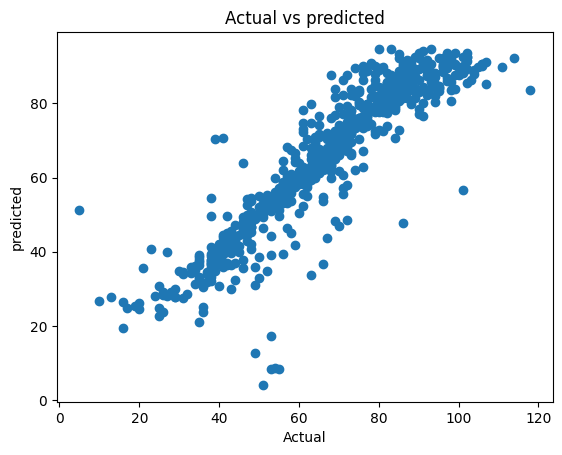

In [88]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [89]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 12ms/step


,Actual,predict,differences
898,57,58.603516,-1.603516
182,25,24.964497,0.035503
565,44,43.489803,0.510197
457,39,40.369980,-1.369980
1852,83,83.829659,-0.829659
568,40,40.576092,-0.576092
1340,71,72.712914,-1.712914
778,48,54.529877,-6.529877
562,43,43.731022,-0.731022
716,58,53.803772,4.196228
